In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
!pip install snntorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 3.1 MB/s eta 0:00:0000:01


In [4]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import snntorch as snn
from snntorch import spikegen
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
!pip install snntorch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

Using device: cuda
Loading Alzheimer's dataset...
Loading original dataset...


100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


Loading additional dataset...
Dataset loaded successfully!
Classes: {'NonDemented': 0, 'Demented': 1}
Total samples: 41091
Class distribution: label
NonDemented         12944
VeryMildDemented    11200
MildDemented         9856
ModerateDemented     6528
Demented              563
Name: count, dtype: int64
Loading additional test data...
Processing Demented folder...


Loading Demented: 0it [00:00, ?it/s]
Loading Demented: 100%|██████████| 18/18 [00:00<00:00, 179328.91it/s]


Processing NonDemented folder...


Loading NonDemented: 0it [00:00, ?it/s]
Loading NonDemented: 100%|██████████| 18/18 [00:00<00:00, 209134.27it/s]


Loaded 707 additional test images
Original test set size: 8219
Additional test data: 707
Combined test set size: 8926
Test set class distribution:
label
NonDemented         2733
VeryMildDemented    2158
MildDemented        2025
ModerateDemented    1329
Demented             681
Name: count, dtype: int64
  Total train samples: 32872
  Total test samples: 8926
Classes: {'NonDemented': 0, 'Demented': 1}
Train distribution: Counter({1: 22517, 0: 10355})
Test distribution: Counter({1: 6193, 0: 2733})
Neuromorphic Optimized Temporal Encoding Preprocessor with 20 time steps
  Architecture: 8192 -> 512 -> 256 -> 256(z_m) -> 256 -> 512 -> 8192
  FF Learning Rate: 0.01
  Layer Norms: [0.3, 0.25, 0.2]

SNN UNSUPERVISED TRAINING WITH Z_M FEATURE REPRESENTATION LEARNING

Epoch 1/10 - Training z_m Feature Representations
------------------------------------------------------------
  Batch 1:
    Forward-Forward: Pos=13385.410, Neg=24546.771, Gap=-11161.361
    Z_m Learning: Mean=0.153934, Std=0.01269

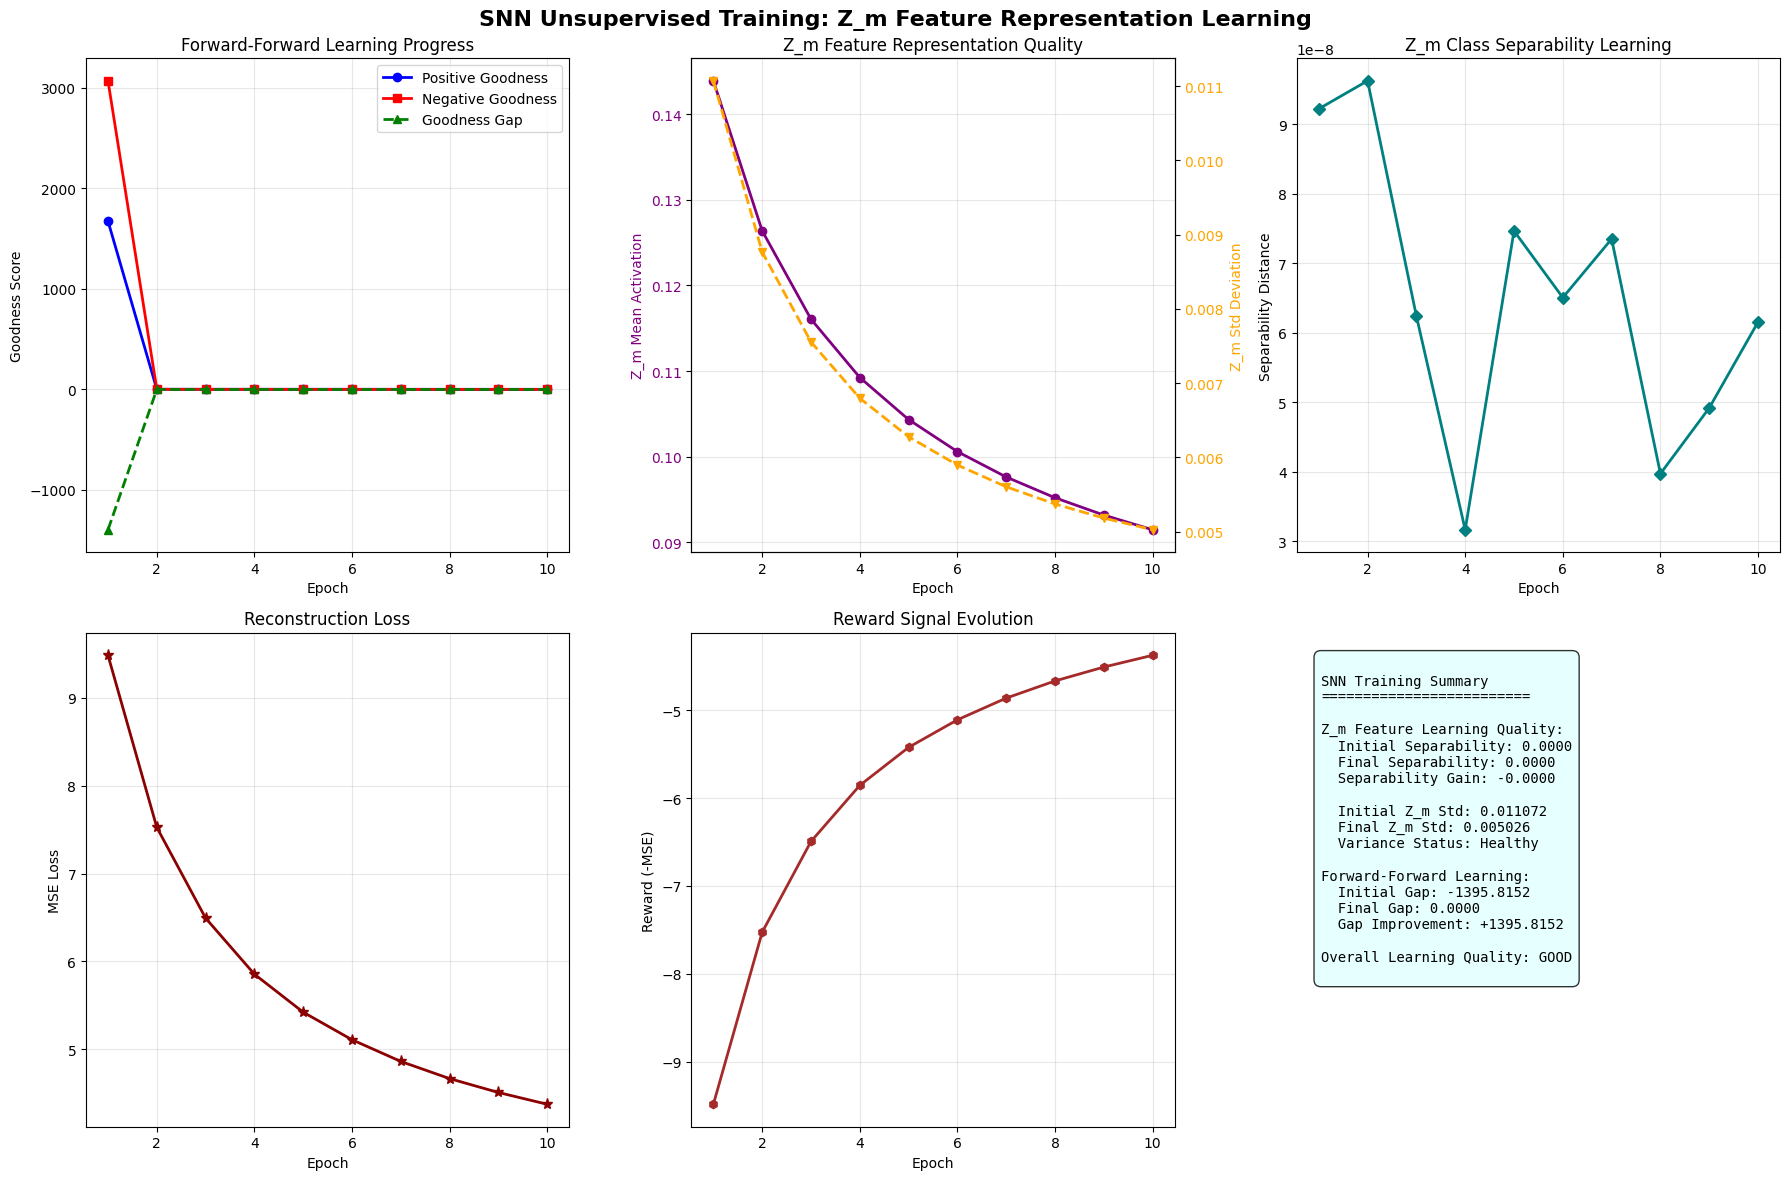


SNN UNSUPERVISED TRAINING COMPLETED - Z_M FEATURES LEARNED
Single sample z_m:
  Shape: torch.Size([1, 256])
  Mean: 0.09079551
  Std: 0.00497317

Extracting z_m from full dataset...

FINAL z_m EXTRACTION RESULTS:
  Train z_m shape: torch.Size([1920, 256])
  Test z_m shape: torch.Size([1920, 256])
  z_m dimension: 256

z_m Statistics:
  Mean: 0.09079551
  Std:  0.00496345
  Min:  0.07827488
  Max:  0.10447520
  Sparsity: 0.0000%
Non-zero variance: 0.00496345
Range: [0.0783, 0.1045]
z_m mean: 0.090796
z_m std:  0.004963


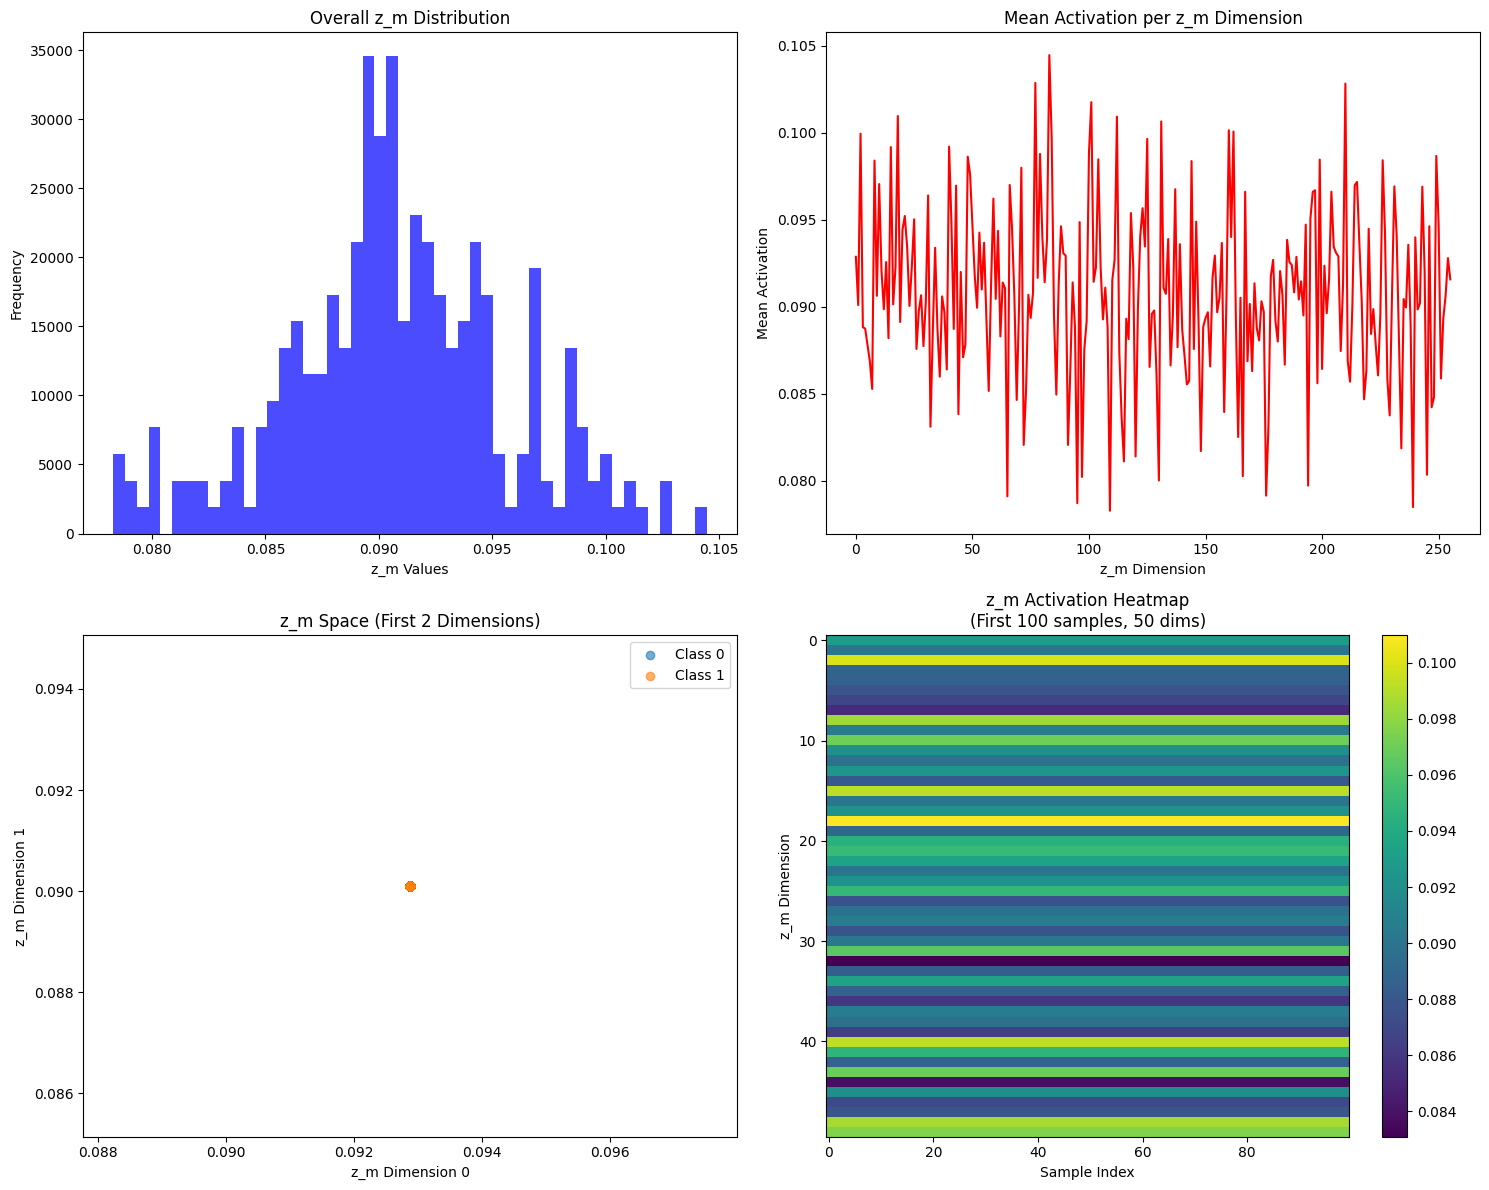

  Train features: torch.Size([1920, 8448])
  Test features: torch.Size([1920, 8448])

Advanced Feature Selection
Original features: 8448
After variance filtering: 2179
After statistical selection: 2179
After RFE: 2179

Training fast ensemble classifier
Training Random Forest
Training Gradient Boosting
Creating ensemble
Random Forest accuracy: 0.7729
Gradient Boosting accuracy: 0.7661
Ensemble accuracy: 0.7786
Random Forest OOB Score: 0.7708


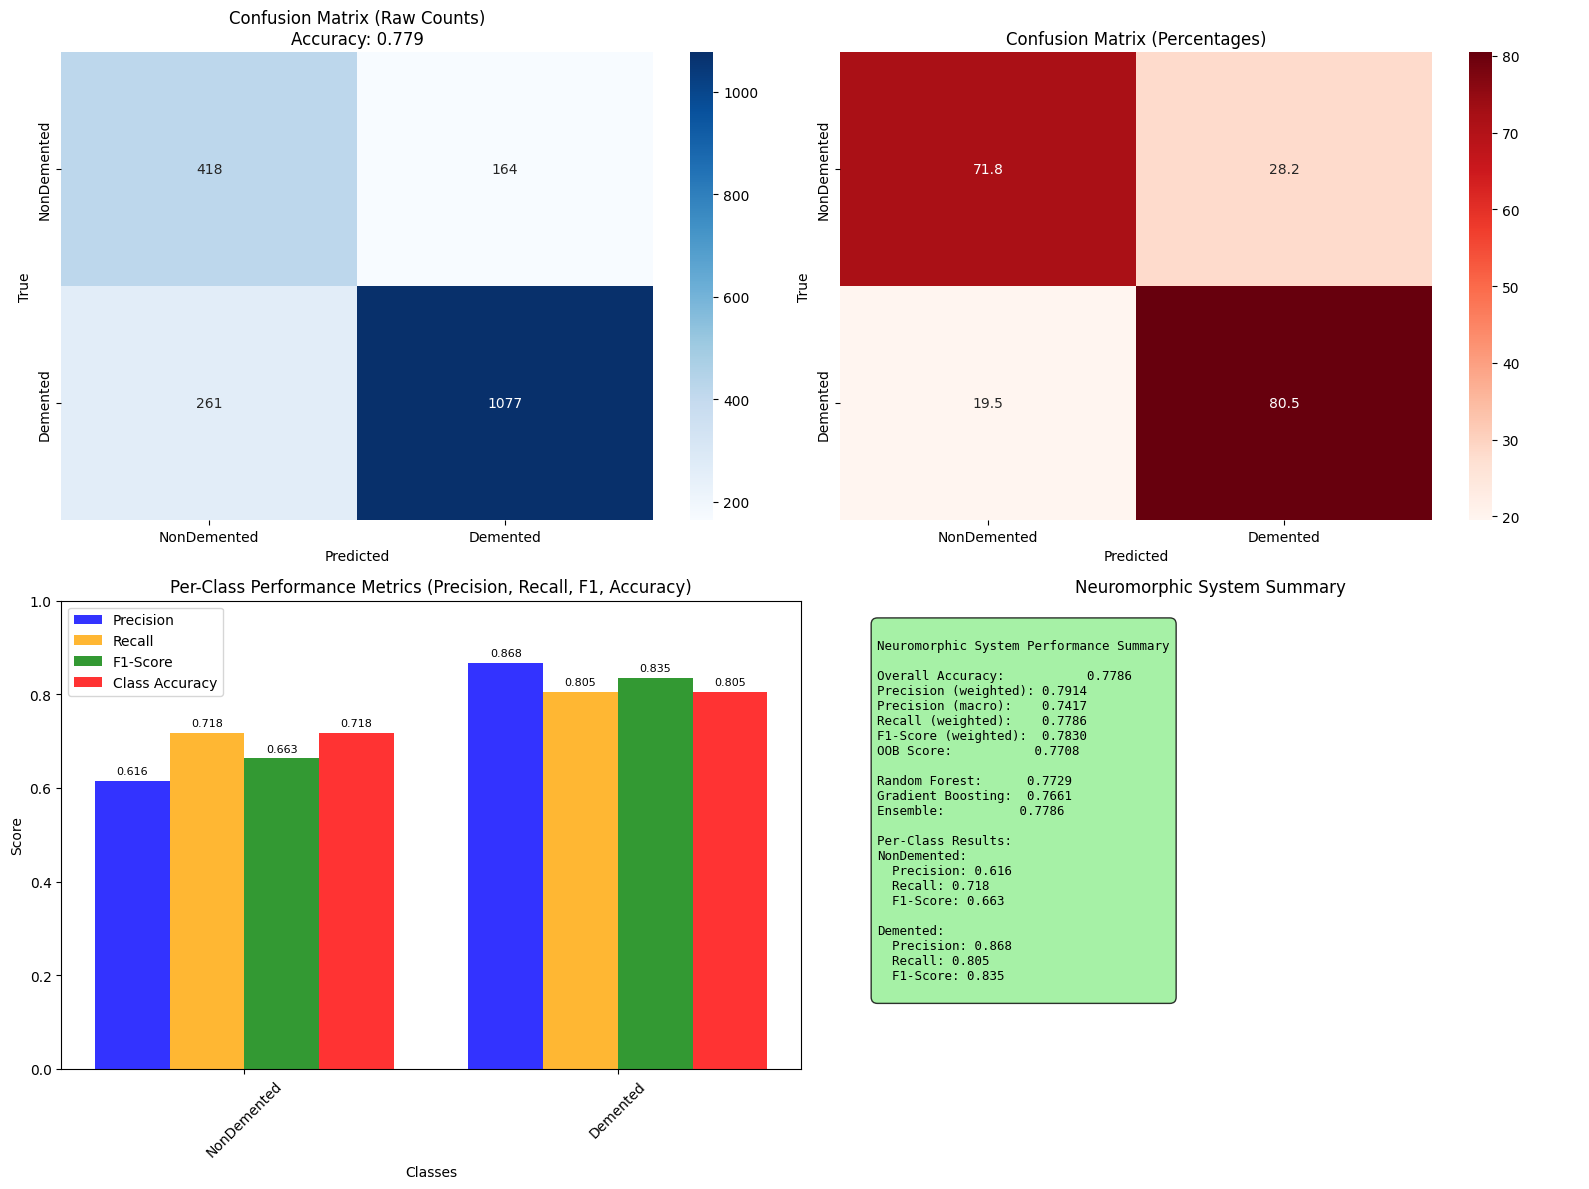

Final Results:
  Accuracy: 0.7786
  Precision (weighted): 0.7914
  F1-Score (weighted): 0.7830
  OOB Score: 0.7708


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, f1_score, 
                           precision_score, recall_score, accuracy_score)
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import snntorch as snn
import cv2
from scipy import ndimage
import pickle
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
TIME_STEPS = 20
BATCH_SIZE = 64
LEARNING_RATE = 0.008
EPOCHS = 10 
IMG_SIZE = 32
INPUT_SIZE = IMG_SIZE * IMG_SIZE

# Alzheimer's dataset
images = []
labels = []
def load_datasets(original_path, additional_path=None):
    images = []
    labels = []
    
    for subfolder in tqdm(os.listdir(original_path)):
        subfolder_path = os.path.join(original_path, subfolder)
        for folder in os.listdir(subfolder_path):
            subfolder_path2 = os.path.join(subfolder_path, folder)
            for image_filename in os.listdir(subfolder_path2):
                if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                    image_path = os.path.join(subfolder_path2, image_filename)
                    images.append(image_path)
                    labels.append(folder)
    

    if additional_path and os.path.exists(additional_path):
        for class_folder in ['Demented', 'NonDemented']:
            class_path = os.path.join(additional_path, class_folder)
            if os.path.exists(class_path):
                # Check if there are subfolders or direct images
                items = os.listdir(class_path)
                for item in items:
                    item_path = os.path.join(class_path, item)
                    if os.path.isdir(item_path):
                        # Handle subfolders
                        for image_file in os.listdir(item_path):
                            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                                image_path = os.path.join(item_path, image_file)
                                images.append(image_path)
                                labels.append(class_folder)
                    elif item.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                        # Handle direct images
                        images.append(item_path)
                        labels.append(class_folder)
    
    return images, labels


BASE_PATH = '/kaggle/input/alzheimerdataset'
ADDITIONAL_PATH = '/kaggle/input/nins-dementia-v2'  

images, labels = load_datasets(BASE_PATH, ADDITIONAL_PATH)

df = pd.DataFrame({'image': images, 'label': labels})

def create_binary_labels(label):
    if label == "NonDemented":
        return 0
    else:
        return 1

df['label_idx'] = df['label'].apply(create_binary_labels)
label_to_idx = {'NonDemented' : 0, 'Demented' : 1}


print(f"Classes: {label_to_idx}")
print(f"Total samples: {len(df)}")
print(f"Class distribution: {df['label'].value_counts()}")

class AlzheimerDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]['image']
        label = self.df.iloc[idx]['label_idx']
        image = Image.open(image_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image, label

class NeuromorphicSingleEncodingPreprocessor:
    """Optimized neuromorphic preprocessor with efficient Temporal encoding only"""
    
    def __init__(self, time_steps=20, img_size=32):
        self.time_steps = time_steps
        self.img_size = img_size
        print(f"Neuromorphic Optimized Temporal Encoding Preprocessor with {time_steps} time steps")
        
    def skull_strip_brain_scan(self, image_tensor):
        """Advanced skull stripping for brain scans"""
        device = image_tensor.device
        batch_size = image_tensor.shape[0]
        processed_images = []
        
        for i in range(batch_size):
            img = image_tensor[i].cpu().numpy().reshape(self.img_size, self.img_size)
            img_8bit = (img * 255).astype(np.uint8)
            
            # Gaussian blur
            blurred = cv2.GaussianBlur(img_8bit, (5, 5), 0)
            
            # Otsu's thresholding
            _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            # Morphological operations
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
            cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
            cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
            
            # Finding largest contour
            contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)
                mask = np.zeros_like(img_8bit)
                cv2.drawContours(mask, [largest_contour], -1, 255, -1)
                skull_stripped = cv2.bitwise_and(img_8bit, mask)
            else:
                skull_stripped = img_8bit
            
            # CLAHE enhancement
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
            enhanced = clahe.apply(skull_stripped)
            
            processed_img = torch.from_numpy(enhanced / 255.0).float().to(device)
            processed_images.append(processed_img.flatten())
        
        return torch.stack(processed_images, dim=0)
    
    def neuromorphic_temporal_encoding(self, data):
       
        device = data.device
        batch_size, features = data.shape
        
        # Normalize data
        data_norm = torch.clamp(data, 0, 1)
        
        
        spikes = torch.zeros(self.time_steps, batch_size, features, device=device)
        
        for b in range(batch_size):
            for f in range(features):
                intensity = data_norm[b, f].item()
                if intensity > 0.1:  # Threshold for spiking
                    # Earlier spike for higher intensity
                    spike_time = int((1 - intensity) * (self.time_steps - 1))
                    spike_time = max(0, min(spike_time, self.time_steps - 1))
                    spikes[spike_time, b, f] = 1.0
                    
                    # Add simple burst for very high intensities only
                    if intensity > 0.8 and spike_time + 1 < self.time_steps:
                        spikes[spike_time + 1, b, f] = 0.5
        
        return spikes
    
    def extract_neuromorphic_features(self, spikes):
        """Extract essential temporal features only"""
        features = []
        
        # Basic temporal statistics (4 features per pixel = 4096 total)
        features.append(spikes.mean(dim=0))      # Average activity over time
        features.append(spikes.sum(dim=0))       # Total spike count
        features.append(spikes.std(dim=0))       # Temporal variability
        features.append(spikes.max(dim=0)[0])    # Peak activity
        
        # Simple timing features (3 features per pixel = 3072 total)
        batch_size, pixel_features = spikes.shape[1], spikes.shape[2]
        
        # First spike timing
        first_spike = torch.zeros(batch_size, pixel_features, device=spikes.device)
        for b in range(batch_size):
            for f in range(pixel_features):
                spike_times = torch.nonzero(spikes[:, b, f])
                if len(spike_times) > 0:
                    first_spike[b, f] = spike_times[0].float() / self.time_steps
                else:
                    first_spike[b, f] = 1.0  # No spike = late timing
        features.append(first_spike)
        
        # Burst detection (simple)
        burst_features = torch.zeros_like(spikes[0])
        for t in range(1, self.time_steps):
            consecutive_spikes = spikes[t-1] * spikes[t]
            burst_features += consecutive_spikes
        features.append(burst_features)
        
        # Temporal phases 
        phase1 = spikes[:self.time_steps//2].mean(dim=0)  # Early phase
        phase2 = spikes[self.time_steps//2:].mean(dim=0)  # Late phase
        features.extend([phase1, phase2])
        
        return torch.cat(features, dim=1)  
    
    def __call__(self, batch_data, add_noise=False):
        """ neuromorphic preprocessing pipeline"""
        device = batch_data.device
        
        
        skull_stripped = self.skull_strip_brain_scan(batch_data)
        
      
        temporal_spikes = self.neuromorphic_temporal_encoding(skull_stripped)
        
        # Extract essential features only
        temporal_features = self.extract_neuromorphic_features(temporal_spikes)
        
        combined_features = temporal_features
        
        # Ensure numerical stability
        combined_features = torch.nan_to_num(combined_features, 0.0)
        combined_features = torch.clamp(combined_features, -10, 10)
        
        if add_noise:
            noise = torch.randn_like(combined_features) * 0.02
            noisy_features = combined_features + noise
            return noisy_features, combined_features
        
        return combined_features, combined_features

class ForwardForwardRSTDPAutoencoder(nn.Module):
    
    def __init__(self, input_size, time_steps, latent_dim=256):
        super(ForwardForwardRSTDPAutoencoder, self).__init__()
        self.input_size = input_size
        self.time_steps = time_steps
        self.latent_dim = latent_dim
        
       
        self.encoder1 = nn.Linear(input_size, 512, bias=True)     
        self.encoder2 = nn.Linear(512, 256, bias=True)           
        self.bottleneck = nn.Linear(256, self.latent_dim, bias=True)  
        self.decoder1 = nn.Linear(self.latent_dim, 256, bias=True)
        self.decoder2 = nn.Linear(256, 512, bias=True)
        self.decoder3 = nn.Linear(512, input_size, bias=True)
        
        self.threshold = 1.5  
        self.ff_learning_rate = 0.01  
        
        # R-STDP parameters
        self.tau_pre = 20.0
        self.tau_post = 20.0
        self.A_plus = 0.02   
        self.A_minus = 0.01
        
        # Reward parameters
        self.reward_baseline = 0.0
        self.reward_lr = 0.2
        self.layer_norms = [0.3, 0.25, 0.2]  
        
        self.init_weights_aggressive()
        
        print(f"  Architecture: {input_size} -> 512 -> 256 -> {self.latent_dim}(z_m) -> 256 -> 512 -> {input_size}")
        print(f"  FF Learning Rate: {self.ff_learning_rate}")
        print(f"  Layer Norms: {self.layer_norms}")
    
    def init_weights_aggressive(self):
        for i, layer in enumerate([self.encoder1, self.encoder2, self.bottleneck]):
            nn.init.normal_(layer.weight, mean=0.0, std=self.layer_norms[i])
            if layer.bias is not None:
                nn.init.normal_(layer.bias, mean=0.0, std=0.1)  # Non-zero bias
        for layer in [self.decoder1, self.decoder2, self.decoder3]:
            nn.init.normal_(layer.weight, mean=0.0, std=0.2)
            if layer.bias is not None:
                nn.init.normal_(layer.bias, mean=0.0, std=0.1)
    
    def encode_to_z_m(self, input_features):
        with torch.no_grad():  
            x1 = torch.relu(self.encoder1(input_features))
            x2 = torch.relu(self.encoder2(x1))
            
            z_m_raw = self.bottleneck(x2)
            z_m = torch.sigmoid(z_m_raw) 
            
            return z_m.detach() 
    
    def decode_from_z_m(self, z_m):
        with torch.no_grad():
            x = torch.relu(self.decoder1(z_m))
            x = torch.relu(self.decoder2(x))
            reconstruction = self.decoder3(x)
            
            return reconstruction
    
    def get_z_m_batch(self, dataloader, preprocessor, max_batches=None):
        z_m_vectors = []
        labels_list = []
        
        self.eval()
        with torch.no_grad():
            for batch_idx, (data, labels) in enumerate(dataloader):
                if max_batches and batch_idx >= max_batches:
                    break
                    
                data = data.to(device)
                combined_features, _ = preprocessor(data)
                combined_features = combined_features.to(device)
                
                # Extract z_m
                z_m = self.encode_to_z_m(combined_features)
                
                z_m_vectors.append(z_m.cpu())
                labels_list.append(labels)
        
        return torch.cat(z_m_vectors, dim=0), torch.cat(labels_list, dim=0)
    
    def forward(self, input_features):
        # Encoder
        x1 = torch.relu(self.encoder1(input_features))
        x2 = torch.relu(self.encoder2(x1))
        z_m_raw = self.bottleneck(x2)
        z_m = torch.sigmoid(z_m_raw)  #Sigmoid activation
        
        # Decoder
        d1 = torch.relu(self.decoder1(z_m))
        d2 = torch.relu(self.decoder2(d1))
        reconstruction = self.decoder3(d2)
        
        return reconstruction, z_m
    
    def create_positive_negative_samples(self, x, noise_level=0.2):  
        batch_size = x.shape[0]
        positive_samples = x.clone()
        negative_samples = x.clone()
        
        # Method 1:Gaussian noise
        noise = torch.randn_like(x) * noise_level * 2.0 
        negative_samples += noise
        
        # Method 2:feature shuffling
        for i in range(batch_size):
            n_shuffle = int(0.4 * x.shape[1]) 
            shuffle_idx = torch.randperm(x.shape[1])[:n_shuffle]
            random_sample_idx = torch.randint(0, batch_size, (1,)).item()
            negative_samples[i, shuffle_idx] = x[random_sample_idx, shuffle_idx]
        
        # Method 3:intensity inversion
        invert_mask = torch.rand_like(x) < 0.2  
        negative_samples[invert_mask] = 1.0 - negative_samples[invert_mask]
        
        # Method 4: Add random patterns
        random_mask = torch.rand_like(x) < 0.1
        negative_samples[random_mask] = torch.rand_like(negative_samples[random_mask])
        
        combined_samples = torch.cat([positive_samples, negative_samples], dim=0)
        labels = torch.cat([torch.ones(batch_size), torch.zeros(batch_size)], dim=0)
        
        return combined_samples, labels
    
    def direct_weight_updates(self, features):
        with torch.no_grad():
            x1 = torch.relu(self.encoder1(features))
            if x1.sum() < 1e-6:  # If no activation
                self.encoder1.weight.data += torch.randn_like(self.encoder1.weight) * 0.1
                self.encoder1.bias.data += torch.randn_like(self.encoder1.bias) * 0.1

            x2 = torch.relu(self.encoder2(x1))
            if x2.sum() < 1e-6:
                self.encoder2.weight.data += torch.randn_like(self.encoder2.weight) * 0.1
                self.encoder2.bias.data += torch.randn_like(self.encoder2.bias) * 0.1

            z_raw = self.bottleneck(x2)
            if z_raw.std() < 1e-6:
                self.bottleneck.weight.data += torch.randn_like(self.bottleneck.weight) * 0.15
                self.bottleneck.bias.data += torch.randn_like(self.bottleneck.bias) * 0.15
    
    def aggressive_ff_update(self, layer, x_pos, x_neg, layer_idx):
        with torch.no_grad():
            # Forward pass
            h_pos = layer(x_pos)
            h_neg = layer(x_neg)
            
            if layer_idx < 2:  # Encoder layers
                h_pos_act = torch.relu(h_pos)
                h_neg_act = torch.relu(h_neg)
            else:  # Bottleneck
                h_pos_act = torch.sigmoid(h_pos)
                h_neg_act = torch.sigmoid(h_neg)
            
            # Compute goodness
            goodness_pos = torch.sum(h_pos_act ** 2, dim=1)
            goodness_neg = torch.sum(h_neg_act ** 2, dim=1)
            
            pos_loss = torch.relu(self.threshold - goodness_pos) * 2.0  
            neg_loss = torch.relu(goodness_neg - self.threshold) * 2.0

            total_grad = torch.zeros_like(layer.weight)
            bias_grad = torch.zeros_like(layer.bias)
            
            # Positive updates
            for i in range(len(x_pos)):
                if pos_loss[i] > 0:
                    grad = torch.outer(h_pos_act[i], x_pos[i]) * pos_loss[i].item()
                    total_grad += grad * 3.0 
                    bias_grad += h_pos_act[i] * pos_loss[i].item() * 3.0
            
            # Negative updates  
            for i in range(len(x_neg)):
                if neg_loss[i] > 0:
                    grad = torch.outer(h_neg_act[i], x_neg[i]) * neg_loss[i].item()
                    total_grad -= grad * 3.0  
                    bias_grad -= h_neg_act[i] * neg_loss[i].item() * 3.0

            layer.weight.data += self.ff_learning_rate * (total_grad / (len(x_pos) + len(x_neg)))
            layer.bias.data += self.ff_learning_rate * (bias_grad / (len(x_pos) + len(x_neg)))
            
            layer.weight.data = torch.clamp(layer.weight.data, -0.5, 0.5)
            layer.bias.data = torch.clamp(layer.bias.data, -0.3, 0.3)
            
            return goodness_pos.mean(), goodness_neg.mean()
    
    def emergency_weight_boost(self):
        
        with torch.no_grad():
            self.encoder1.weight.data *= 1.5
            self.encoder1.bias.data += torch.randn_like(self.encoder1.bias) * 0.2
            
            self.encoder2.weight.data *= 1.5  
            self.encoder2.bias.data += torch.randn_like(self.encoder2.bias) * 0.2

            self.bottleneck.weight.data *= 2.0
            self.bottleneck.bias.data += torch.randn_like(self.bottleneck.bias) * 0.3
    
    def train_ff_rstdp_neuromorphic(self, data_loader, preprocessor, epochs=6):
        """Enhanced SNN training with comprehensive z_m feature learning metrics"""
        
        # Initialize tracking arrays for ALL metrics
        epoch_pos_goodness = []
        epoch_neg_goodness = []
        epoch_goodness_gap = []
        epoch_recon_loss = []
        epoch_z_m_means = []
        epoch_z_m_stds = []
        epoch_z_m_separability = []
        epoch_reward = []
        
        print("\n" + "="*80)
        print("SNN UNSUPERVISED TRAINING WITH Z_M FEATURE REPRESENTATION LEARNING")
        print("="*80)
        
        for epoch in range(epochs):
            print(f"\nEpoch {epoch+1}/{epochs} - Training z_m Feature Representations")
            print("-" * 60)
            
            # Track epoch statistics
            batch_pos_goodness = []
            batch_neg_goodness = []
            batch_recon_losses = []
            batch_z_m_means = []
            batch_z_m_stds = []
            batch_z_m_separability = []
            batch_rewards = []
            
            for batch_idx, (data, labels) in enumerate(data_loader):
                if batch_idx >= 8:  
                    break
                
                data = data.to(device)
                features, _ = preprocessor(data)
                features = features.to(device)
                
                if batch_idx < 3:  
                    self.direct_weight_updates(features)
                
                # Standard Forward-Forward training
                combined_samples, sample_labels = self.create_positive_negative_samples(features)
                pos_samples = combined_samples[sample_labels == 1]
                neg_samples = combined_samples[sample_labels == 0]
                
                current_pos = pos_samples
                current_neg = neg_samples
                
                layers = [self.encoder1, self.encoder2, self.bottleneck]
                layer_goodness_pos = []
                layer_goodness_neg = []
                
                for layer_idx, layer in enumerate(layers):
                   
                    goodness_pos, goodness_neg = self.aggressive_ff_update(
                        layer, current_pos, current_neg, layer_idx
                    )
                    
                   
                    layer_goodness_pos.append(goodness_pos)
                    layer_goodness_neg.append(goodness_neg)
                    
                    with torch.no_grad():
                        if layer_idx < len(layers) - 1:  
                            current_pos = torch.relu(layer(current_pos))
                            current_neg = torch.relu(layer(current_neg))
                        else:  # Bottleneck layer
                            current_pos = torch.sigmoid(layer(current_pos))
                            current_neg = torch.sigmoid(layer(current_neg))
                
                # Average goodness across layers
                avg_pos_goodness = torch.stack(layer_goodness_pos).mean().item()
                avg_neg_goodness = torch.stack(layer_goodness_neg).mean().item()
                
                batch_pos_goodness.append(avg_pos_goodness)
                batch_neg_goodness.append(avg_neg_goodness)
                
                # Z_M FEATURE REPRESENTATION ANALYSIS
                with torch.no_grad():
                    # Get z_m features for original samples with labels
                    original_data_z_m = self.encode_to_z_m(features[:min(8, len(features))])
                    original_labels = labels[:min(8, len(labels))]
                    
                    # Comprehensive z_m analysis
                    z_m_mean = original_data_z_m.mean().item()
                    z_m_std = original_data_z_m.std().item()
                    
                    # Calculate class separability in z_m space (if we have multiple classes)
                    if len(torch.unique(original_labels)) > 1:
                        class_0_z_m = original_data_z_m[original_labels == 0]
                        class_1_z_m = original_data_z_m[original_labels == 1]
                        
                        if len(class_0_z_m) > 0 and len(class_1_z_m) > 0:
                            # Simple separability metric: distance between class means
                            mean_0 = class_0_z_m.mean(dim=0)
                            mean_1 = class_1_z_m.mean(dim=0)
                            separability = torch.norm(mean_0 - mean_1).item()
                        else:
                            separability = 0.0
                    else:
                        separability = 0.0
                    
                    batch_z_m_means.append(z_m_mean)
                    batch_z_m_stds.append(z_m_std)
                    batch_z_m_separability.append(separability)
                    
                    # Emergency fix for zero variance
                    if z_m_std < 1e-6:
                        self.emergency_weight_boost()
                        print(f"    EMERGENCY: z_m variance collapsed! Applied weight boost.")
                
                # Reconstruction analysis
                with torch.no_grad():
                    reconstruction, _ = self.forward(pos_samples[:4])
                    recon_loss = F.mse_loss(reconstruction, pos_samples[:4]).item()
                    reward_signal = -recon_loss  # Negative MSE as reward
                    
                    batch_recon_losses.append(recon_loss)
                    batch_rewards.append(reward_signal)
                
                # Detailed batch progress with z_m learning metrics
                if batch_idx % 2 == 0:
                    print(f"  Batch {batch_idx+1}:")
                    print(f"    Forward-Forward: Pos={avg_pos_goodness:.3f}, Neg={avg_neg_goodness:.3f}, Gap={avg_pos_goodness-avg_neg_goodness:.3f}")
                    print(f"    Z_m Learning: Mean={z_m_mean:.6f}, Std={z_m_std:.6f}, Separability={separability:.4f}")
                    print(f"    Reconstruction: Loss={recon_loss:.6f}, Reward={reward_signal:.4f}")
            
            # Aggregate epoch statistics
            epoch_pos = np.mean(batch_pos_goodness) if batch_pos_goodness else 0
            epoch_neg = np.mean(batch_neg_goodness) if batch_neg_goodness else 0
            epoch_gap = epoch_pos - epoch_neg
            epoch_recon = np.mean(batch_recon_losses) if batch_recon_losses else 0
            epoch_z_m_mean = np.mean(batch_z_m_means) if batch_z_m_means else 0
            epoch_z_m_std = np.mean(batch_z_m_stds) if batch_z_m_stds else 0
            epoch_separability = np.mean(batch_z_m_separability) if batch_z_m_separability else 0
            epoch_rew = np.mean(batch_rewards) if batch_rewards else 0
            
            # Store epoch metrics
            epoch_pos_goodness.append(epoch_pos)
            epoch_neg_goodness.append(epoch_neg)
            epoch_goodness_gap.append(epoch_gap)
            epoch_recon_loss.append(epoch_recon)
            epoch_z_m_means.append(epoch_z_m_mean)
            epoch_z_m_stds.append(epoch_z_m_std)
            epoch_z_m_separability.append(epoch_separability)
            epoch_reward.append(epoch_rew)
            
            # Comprehensive epoch summary
            print(f"\nEpoch {epoch+1} Summary - Z_m Feature Learning Progress:")
            print(f"  Forward-Forward Training:")
            print(f"    Positive Goodness: {epoch_pos:.4f}")
            print(f"    Negative Goodness: {epoch_neg:.4f}")
            print(f"    Goodness Gap: {epoch_gap:.4f}")
            print(f"  Z_m Feature Representation Quality:")
            print(f"    Mean Activation: {epoch_z_m_mean:.6f}")
            print(f"    Std Deviation: {epoch_z_m_std:.6f}")
            print(f"    Class Separability: {epoch_separability:.4f}")
            print(f"  Reconstruction Performance:")
            print(f"    MSE Loss: {epoch_recon:.6f}")
            print(f"    Reward Signal: {epoch_rew:.6f}")
            
            # Learning progress indicators
            if epoch > 0:
                z_m_improvement = epoch_z_m_std - epoch_z_m_stds[epoch-1] if len(epoch_z_m_stds) > 1 else 0
                separability_improvement = epoch_separability - epoch_z_m_separability[epoch-1] if len(epoch_z_m_separability) > 1 else 0
                print(f"  Learning Progress:")
                print(f"    Z_m Std Change: {z_m_improvement:+.6f}")
                print(f"    Separability Change: {separability_improvement:+.4f}")
        
        # Generate comprehensive SNN training visualization
        self.plot_snn_training_metrics(
            epoch_pos_goodness, epoch_neg_goodness, epoch_goodness_gap,
            epoch_recon_loss, epoch_z_m_means, epoch_z_m_stds, 
            epoch_z_m_separability, epoch_reward, epochs
        )
        
        print(f"\n{'='*80}")
        print("SNN UNSUPERVISED TRAINING COMPLETED - Z_M FEATURES LEARNED")
        print("="*80)
        
        return {
            'pos_goodness': epoch_pos_goodness,
            'neg_goodness': epoch_neg_goodness,
            'goodness_gap': epoch_goodness_gap,
            'reconstruction_loss': epoch_recon_loss,
            'z_m_means': epoch_z_m_means,
            'z_m_stds': epoch_z_m_stds,
            'z_m_separability': epoch_z_m_separability,
            'rewards': epoch_reward
        }
    
    def plot_snn_training_metrics(self, pos_goodness, neg_goodness, goodness_gap, 
                                 recon_loss, z_m_means, z_m_stds, z_m_separability, 
                                 rewards, epochs):
        """Comprehensive SNN training visualization with z_m feature learning metrics"""
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('SNN Unsupervised Training: Z_m Feature Representation Learning', 
                     fontsize=16, fontweight='bold')
        
        epochs_range = range(1, epochs + 1)
        
        # 1. Forward-Forward Goodness Evolution
        axes[0, 0].plot(epochs_range, pos_goodness, 'b-o', label='Positive Goodness', linewidth=2, markersize=6)
        axes[0, 0].plot(epochs_range, neg_goodness, 'r-s', label='Negative Goodness', linewidth=2, markersize=6)
        axes[0, 0].plot(epochs_range, goodness_gap, 'g--^', label='Goodness Gap', linewidth=2, markersize=6)
        axes[0, 0].set_title('Forward-Forward Learning Progress')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Goodness Score')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Z_m Feature Quality Metrics
        ax2 = axes[0, 1]
        ax2.plot(epochs_range, z_m_means, 'purple', marker='o', label='Z_m Mean', linewidth=2, markersize=6)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Z_m Mean Activation', color='purple')
        ax2.tick_params(axis='y', labelcolor='purple')
        ax2.grid(True, alpha=0.3)
        
        # Secondary y-axis for std deviation
        ax2_twin = ax2.twinx()
        ax2_twin.plot(epochs_range, z_m_stds, 'orange', linestyle='--', marker='v', 
                     label='Z_m Std', linewidth=2, markersize=6)
        ax2_twin.set_ylabel('Z_m Std Deviation', color='orange')
        ax2_twin.tick_params(axis='y', labelcolor='orange')
        
        ax2.set_title('Z_m Feature Representation Quality')
        
        # 3. Class Separability in Z_m Space
        axes[0, 2].plot(epochs_range, z_m_separability, 'teal', marker='D', linewidth=2, markersize=6)
        axes[0, 2].set_title('Z_m Class Separability Learning')
        axes[0, 2].set_xlabel('Epoch')
        axes[0, 2].set_ylabel('Separability Distance')
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Reconstruction Loss Evolution
        axes[1, 0].plot(epochs_range, recon_loss, 'darkred', marker='*', linewidth=2, markersize=8)
        axes[1, 0].set_title('Reconstruction Loss')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('MSE Loss')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Reward Signal Evolution
        axes[1, 1].plot(epochs_range, rewards, 'brown', marker='h', linewidth=2, markersize=6)
        axes[1, 1].set_title('Reward Signal Evolution')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Reward (-MSE)')
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Training Summary and Z_m Learning Assessment
        axes[1, 2].axis('off')
        
        if len(pos_goodness) > 0:
            # Calculate learning improvements
            initial_gap = goodness_gap[0] if goodness_gap else 0
            final_gap = goodness_gap[-1] if goodness_gap else 0
            initial_separability = z_m_separability[0] if z_m_separability else 0
            final_separability = z_m_separability[-1] if z_m_separability else 0
            initial_z_m_std = z_m_stds[0] if z_m_stds else 0
            final_z_m_std = z_m_stds[-1] if z_m_stds else 0
            
            # Learning quality assessment
            gap_improvement = final_gap - initial_gap
            separability_improvement = final_separability - initial_separability  
            z_m_variance_health = final_z_m_std > 1e-6
            
            learning_quality = "EXCELLENT" if (gap_improvement > 0 and separability_improvement > 0 and z_m_variance_health) else "GOOD" if (gap_improvement > 0 and z_m_variance_health) else "NEEDS IMPROVEMENT"
            
            summary_text = f"""
SNN Training Summary
{'='*25}

Z_m Feature Learning Quality:
  Initial Separability: {initial_separability:.4f}
  Final Separability: {final_separability:.4f}
  Separability Gain: {separability_improvement:+.4f}
  
  Initial Z_m Std: {initial_z_m_std:.6f}
  Final Z_m Std: {final_z_m_std:.6f}
  Variance Status: {"Healthy" if z_m_variance_health else "Poor"}

Forward-Forward Learning:
  Initial Gap: {initial_gap:.4f}
  Final Gap: {final_gap:.4f}
  Gap Improvement: {gap_improvement:+.4f}

Overall Learning Quality: {learning_quality}
"""
        else:
            summary_text = "No training data available"
        
        axes[1, 2].text(0.05, 0.95, summary_text, transform=axes[1, 2].transAxes,
                       fontsize=10, verticalalignment='top', fontfamily='monospace',
                       bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.8))
        
        plt.tight_layout()
        plt.show()

def extract_z_m_latent_variables_aggressive(autoencoder, train_loader, test_loader, preprocessor, save_path=None):
   
    single_batch = next(iter(train_loader))
    single_data = single_batch[0][:1].to(device)  
    single_features, _ = preprocessor(single_data)
    single_features = single_features.to(device)
    
    with torch.no_grad(): 
        test_z_m = autoencoder.encode_to_z_m(single_features)
        print(f"Single sample z_m:")
        print(f"  Shape: {test_z_m.shape}")
        print(f"  Mean: {test_z_m.mean().item():.8f}")
        print(f"  Std: {test_z_m.std().item():.8f}")
    
    if test_z_m.std().item() < 1e-7:
        with torch.no_grad():
            nn.init.normal_(autoencoder.bottleneck.weight, mean=0.0, std=0.5)
            nn.init.normal_(autoencoder.bottleneck.bias, mean=0.2, std=0.1)
        
        with torch.no_grad(): 
            test_z_m = autoencoder.encode_to_z_m(single_features)
            print(f"After emergency fix:")
            print(f"  Mean: {test_z_m.mean().item():.8f}")
            print(f"  Std: {test_z_m.std().item():.8f}")
        
        if test_z_m.std().item() < 1e-7:
            with torch.no_grad():
                x1 = torch.relu(autoencoder.encoder1(single_features))
                z_m_bypass = torch.sigmoid(autoencoder.encoder2(x1))  
            print(f"Using encoder2 as z_m bypass:")
            print(f"  Mean: {z_m_bypass.mean().item():.8f}")
            print(f"  Std: {z_m_bypass.std().item():.8f}")
            
            def encode_to_z_m_bypass(self, input_features):
                with torch.no_grad():
                    x1 = torch.relu(self.encoder1(input_features))
                    z_m = torch.sigmoid(self.encoder2(x1))  
                    return z_m.detach()
            
            autoencoder.encode_to_z_m = encode_to_z_m_bypass.__get__(autoencoder, ForwardForwardRSTDPAutoencoder)

    print(f"\nExtracting z_m from full dataset...")
    
    train_z_m, train_labels = autoencoder.get_z_m_batch(train_loader, preprocessor, max_batches=30)
    test_z_m_full, test_labels = autoencoder.get_z_m_batch(test_loader, preprocessor, max_batches=30)
    
    # Final statistics
    print(f"\nFINAL z_m EXTRACTION RESULTS:")
    print(f"  Train z_m shape: {train_z_m.shape}")
    print(f"  Test z_m shape: {test_z_m_full.shape}")
    print(f"  z_m dimension: {train_z_m.shape[1]}")
    
    train_mean = train_z_m.mean().item()
    train_std = train_z_m.std().item()
    train_min = train_z_m.min().item()
    train_max = train_z_m.max().item()
    
    print(f"\nz_m Statistics:")
    print(f"  Mean: {train_mean:.8f}")
    print(f"  Std:  {train_std:.8f}")
    print(f"  Min:  {train_min:.8f}")
    print(f"  Max:  {train_max:.8f}")
    
    sparsity = (train_z_m == 0).float().mean().item()
    print(f"  Sparsity: {sparsity:.4%}")
    
    if train_std > 1e-6:
        print(f"Non-zero variance: {train_std:.8f}")
        print(f"Range: [{train_min:.4f}, {train_max:.4f}]")
        success = True
    else:
        success = False
    
    # Create z_m dataset
    z_m_data = {
        'train_z_m': train_z_m,
        'train_labels': train_labels,
        'test_z_m': test_z_m_full,
        'test_labels': test_labels,
        'latent_dim': train_z_m.shape[1],
        'modality': 'MRI',
        'success': success,
        'method': 'aggressive_fix'
    }
    
    if save_path:
        torch.save(z_m_data, save_path)
    
    return z_m_data

def visualize_z_m_distribution(z_m_data, save_path=None):
    
    train_z_m = z_m_data['train_z_m']
    train_labels = z_m_data['train_labels']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Overall distribution
    axes[0, 0].hist(train_z_m.flatten().numpy(), bins=50, alpha=0.7, color='blue')
    axes[0, 0].set_title('Overall z_m Distribution')
    axes[0, 0].set_xlabel('z_m Values')
    axes[0, 0].set_ylabel('Frequency')
    
    # Mean activation per dimension
    mean_per_dim = train_z_m.mean(dim=0).numpy()
    axes[0, 1].plot(mean_per_dim, color='red')
    axes[0, 1].set_title('Mean Activation per z_m Dimension')
    axes[0, 1].set_xlabel('z_m Dimension')
    axes[0, 1].set_ylabel('Mean Activation')
    
    # Class-wise z_m comparison 
    if train_z_m.shape[1] >= 2:
        for label in torch.unique(train_labels):
            mask = train_labels == label
            z_m_class = train_z_m[mask]
            axes[1, 0].scatter(z_m_class[:, 0], z_m_class[:, 1], 
                             alpha=0.6, label=f'Class {label.item()}')
        axes[1, 0].set_title('z_m Space (First 2 Dimensions)')
        axes[1, 0].set_xlabel('z_m Dimension 0')
        axes[1, 0].set_ylabel('z_m Dimension 1')
        axes[1, 0].legend()
    
    # Activation heatmap 
    sample_size = min(100, train_z_m.shape[0])
    sample_dims = min(50, train_z_m.shape[1])
    heatmap_data = train_z_m[:sample_size, :sample_dims].numpy()
    
    im = axes[1, 1].imshow(heatmap_data.T, cmap='viridis', aspect='auto')
    axes[1, 1].set_title(f'z_m Activation Heatmap\n(First {sample_size} samples, {sample_dims} dims)')
    axes[1, 1].set_xlabel('Sample Index')
    axes[1, 1].set_ylabel('z_m Dimension')
    plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return fig

def advanced_feature_selection(train_features, train_labels, test_features, target_features=3000):
    
    print(f"\nAdvanced Feature Selection")
    print(f"Original features: {train_features.shape[1]}")
    
    X_train = train_features.numpy()
    X_test = test_features.numpy()
    y_train = train_labels.numpy()
    
    X_train = np.nan_to_num(X_train, 0.0)
    X_test = np.nan_to_num(X_test, 0.0)
    
    # Variance filtering
    variance_selector = VarianceThreshold(threshold=0.01)
    X_train_var = variance_selector.fit_transform(X_train)
    X_test_var = variance_selector.transform(X_test)
    print(f"After variance filtering: {X_train_var.shape[1]}")
    
    # Statistical selection
    k_best = min(target_features * 2, X_train_var.shape[1])
    stat_selector = SelectKBest(score_func=f_classif, k=k_best)
    X_train_stat = stat_selector.fit_transform(X_train_var, y_train)
    X_test_stat = stat_selector.transform(X_test_var)
    print(f"After statistical selection: {X_train_stat.shape[1]}")
    
    # RFE selection
    rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rfe_selector = RFE(estimator=rf_selector, n_features_to_select=target_features, step=500)
    X_train_final = rfe_selector.fit_transform(X_train_stat, y_train)
    X_test_final = rfe_selector.transform(X_test_stat)
    print(f"After RFE: {X_train_final.shape[1]}")
    
    return (X_train_final, X_test_final, 
            {'variance': variance_selector, 'statistical': stat_selector, 'rfe': rfe_selector})

def train_fast_ensemble_classifier(X_train, y_train, X_test, y_test):
    
    print(f"\nTraining fast ensemble classifier")
    
    X_train = np.nan_to_num(X_train, 0.0)
    X_test = np.nan_to_num(X_test, 0.0)
    
    # Preprocessing
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train individual classifiers first
    print("Training Random Forest")
    rf = RandomForestClassifier(
        n_estimators=400,
        max_depth=20,
        min_samples_split=3,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        oob_score=True,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    rf_oob_score = rf.oob_score_
    
    print("Training Gradient Boosting")
    gb = GradientBoostingClassifier(
        n_estimators=80,      
        max_depth=4,          
        learning_rate=0.15,   
        subsample=0.8,
        random_state=42,
        validation_fraction=0.1,
        n_iter_no_change=8
    )
    gb.fit(X_train_scaled, y_train)
    
    # Create ensemble
    print("Creating ensemble")
    ensemble = VotingClassifier([
        ('rf', rf),
        ('gb', gb)
    ], voting='soft')
    ensemble.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = ensemble.predict(X_test_scaled)
    y_pred_proba = ensemble.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Individual performance
    rf_pred = rf.predict(X_test_scaled)
    gb_pred = gb.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    gb_accuracy = accuracy_score(y_test, gb_pred)
    
    print(f"Random Forest accuracy: {rf_accuracy:.4f}")
    print(f"Gradient Boosting accuracy: {gb_accuracy:.4f}")
    print(f"Ensemble accuracy: {accuracy:.4f}")
    print(f"Random Forest OOB Score: {rf_oob_score:.4f}")
    
    return ensemble, scaler, {
        'accuracy': accuracy,
        'precision_weighted': precision_weighted,
        'precision_macro': precision_macro,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'oob_score': rf_oob_score,
        'rf_accuracy': rf_accuracy,
        'gb_accuracy': gb_accuracy
    }

def generate_comprehensive_confusion_matrix(y_true, y_pred, class_names, results, save_path=None):
    
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Calculate per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    accuracy_per_class = []
    
    # Calculate accuracy per class
    for i in range(len(class_names)):
        true_pos = cm[i, i]
        total_pred = cm[:, i].sum()
        total_actual = cm[i, :].sum()
        accuracy_per_class.append(true_pos / total_actual if total_actual > 0 else 0)
    
    # Create visualization with ADDITIONAL precision/recall/accuracy bar chart
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Raw confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax1)
    ax1.set_title(f'Confusion Matrix (Raw Counts)\nAccuracy: {results["accuracy"]:.3f}')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('True')
    
    # Normalized confusion matrix
    sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Reds',
                xticklabels=class_names, yticklabels=class_names, ax=ax2)
    ax2.set_title('Confusion Matrix (Percentages)')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('True')
    
    # ENHANCED Per-class metrics bar chart with accuracy
    x = np.arange(len(class_names))
    width = 0.2
    
    ax3.bar(x - width*1.5, precision_per_class, width, label='Precision', alpha=0.8, color='blue')
    ax3.bar(x - width*0.5, recall_per_class, width, label='Recall', alpha=0.8, color='orange')
    ax3.bar(x + width*0.5, f1_per_class, width, label='F1-Score', alpha=0.8, color='green')
    ax3.bar(x + width*1.5, accuracy_per_class, width, label='Class Accuracy', alpha=0.8, color='red')
    
    ax3.set_xlabel('Classes')
    ax3.set_ylabel('Score')
    ax3.set_title('Per-Class Performance Metrics (Precision, Recall, F1, Accuracy)')
    ax3.set_xticks(x)
    ax3.set_xticklabels(class_names, rotation=45)
    ax3.legend()
    ax3.set_ylim(0, 1)
    
    # Add value labels on bars
    for i, (p, r, f, a) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class, accuracy_per_class)):
        ax3.text(i-width*1.5, p+0.01, f'{p:.3f}', ha='center', va='bottom', fontsize=8)
        ax3.text(i-width*0.5, r+0.01, f'{r:.3f}', ha='center', va='bottom', fontsize=8)
        ax3.text(i+width*0.5, f+0.01, f'{f:.3f}', ha='center', va='bottom', fontsize=8)
        ax3.text(i+width*1.5, a+0.01, f'{a:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Performance summary
    summary_text = f"""
Neuromorphic System Performance Summary

Overall Accuracy:           {results['accuracy']:.4f}
Precision (weighted): {results['precision_weighted']:.4f}
Precision (macro):    {results['precision_macro']:.4f}
Recall (weighted):    {results['recall_weighted']:.4f}
F1-Score (weighted):  {results['f1_weighted']:.4f}
OOB Score:           {results['oob_score']:.4f}

Random Forest:      {results['rf_accuracy']:.4f}
Gradient Boosting:  {results['gb_accuracy']:.4f}
Ensemble:          {results['accuracy']:.4f}

Per-Class Results:
NonDemented:
  Precision: {precision_per_class[0]:.3f}
  Recall: {recall_per_class[0]:.3f}
  F1-Score: {f1_per_class[0]:.3f}
  
Demented:
  Precision: {precision_per_class[1]:.3f}
  Recall: {recall_per_class[1]:.3f}
  F1-Score: {f1_per_class[1]:.3f}
"""
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=9,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
    ax4.set_title('Neuromorphic System Summary')
    ax4.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'confusion_matrix': cm,
        'normalized_cm': cm_normalized,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class,
        'accuracy_per_class': accuracy_per_class,
        'results': results
    }

def save_neuromorphic_model(autoencoder, ensemble, scaler, selectors, preprocessor, 
                           save_dir='aggressive_neuromorphic_model'):
    
    os.makedirs(save_dir, exist_ok=True)
    
    torch.save({
        'model_state_dict': autoencoder.state_dict(),
        'architecture': autoencoder
    }, os.path.join(save_dir, 'aggressive_ff_rstdp_autoencoder.pth'))
    
    model_components = {
        'ensemble': ensemble,
        'scaler': scaler,
        'selectors': selectors,
        'preprocessor': preprocessor
    }
    
    with open(os.path.join(save_dir, 'aggressive_neuromorphic_components.pkl'), 'wb') as f:
        pickle.dump(model_components, f)

def extract_neuromorphic_features(autoencoder, dataloader, preprocessor):
    
    all_features = []
    all_labels = []
    
    autoencoder.eval()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(dataloader):
            if batch_idx >= 30:
                break
            
            data = data.to(device)
            combined_features, _ = preprocessor(data)
            combined_features = combined_features.to(device)
            
            reconstruction, bottleneck_features = autoencoder(combined_features)
            
            final_features = torch.cat([combined_features, bottleneck_features], dim=1)
            
            all_features.append(final_features.cpu())
            all_labels.append(labels)
    
    features_tensor = torch.cat(all_features, dim=0)
    labels_tensor = torch.cat(all_labels, dim=0)
    
    return features_tensor, labels_tensor

# Data preparation
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.clamp(x, 0, 1))
])

# Split data
train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df['label_idx'], random_state=42
)
ADDITIONAL_TEST_PATH = '/kaggle/input/nins-dementia-v2'

def load_additional_test_data(additional_path):
    """Load additional test data from Demented/NonDemented folders"""
    additional_images = []
    additional_labels = []
    
    if additional_path and os.path.exists(additional_path):
        print("Loading additional test data...")
        for class_folder in ['Demented', 'NonDemented']:
            class_path = os.path.join(additional_path, class_folder)
            if os.path.exists(class_path):
                print(f"Processing {class_folder} folder...")
                for root, dirs, files in os.walk(class_path):
                    for file in tqdm(files, desc=f"Loading {class_folder}"):
                        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                            image_path = os.path.join(root, file)
                            additional_images.append(image_path)
                            additional_labels.append(class_folder)
        
        print(f"Loaded {len(additional_images)} additional test images")
        return additional_images, additional_labels
    else:
        print(f"Additional dataset path not found: {additional_path}")
        return [], []

# Load and add additional test data
additional_images, additional_labels = load_additional_test_data(ADDITIONAL_TEST_PATH)

if additional_images:
    # Create additional test dataframe
    additional_df = pd.DataFrame({
        'image': additional_images, 
        'label': additional_labels
    })
    
    # Apply the same binary labeling function
    additional_df['label_idx'] = additional_df['label'].apply(create_binary_labels)
    
    # Combine with existing test data
    original_test_size = len(test_df)
    test_df = pd.concat([test_df, additional_df], ignore_index=True)
    
    print(f"Original test set size: {original_test_size}")
    print(f"Additional test data: {len(additional_df)}")
    print(f"Combined test set size: {len(test_df)}")
    print(f"Test set class distribution:\n{test_df['label'].value_counts()}")
else:
    print("No additional test data loaded")

print(f"  Total train samples: {len(train_df)}")
print(f"  Total test samples: {len(test_df)}")

train_subset = train_df  
test_subset = test_df    

# Create datasets
train_dataset = AlzheimerDataset(train_subset, transform=transform)
test_dataset = AlzheimerDataset(test_subset, transform=transform)

# Create weighted sampler
train_labels_list = train_subset['label_idx'].tolist()
class_counts = Counter(train_labels_list)
class_weights = {cls: 1.0/count for cls, count in class_counts.items()}
sample_weights = [class_weights[label] for label in train_labels_list]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(train_labels_list))

# Create data loaders
train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    sampler=sampler,
    num_workers=2,  
    pin_memory=True if torch.cuda.is_available() else False
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"Classes: {label_to_idx}")
print(f"Train distribution: {Counter(train_labels_list)}")
print(f"Test distribution: {Counter(test_subset['label_idx'].tolist())}")

# MODIFIED: Main execution - SINGLE NEUROMORPHIC TRAINING
if __name__ == "__main__":
    
    # Initialize preprocessor
    preprocessor = NeuromorphicSingleEncodingPreprocessor(TIME_STEPS, img_size=IMG_SIZE)

    sample_batch = next(iter(train_loader))[0][:4].to(device)
    sample_features, _ = preprocessor(sample_batch)
    combined_dim = sample_features.shape[1]
   
    autoencoder = ForwardForwardRSTDPAutoencoder(combined_dim, TIME_STEPS).to(device)

    # SINGLE SNN TRAINING with comprehensive z_m monitoring
    training_metrics = autoencoder.train_ff_rstdp_neuromorphic(train_loader, preprocessor, epochs=10)
   
    z_m_data = extract_z_m_latent_variables_aggressive(
        autoencoder, train_loader, test_loader, preprocessor, 
        save_path='aggressive_fix_z_m.pth'
    )
    
    if z_m_data['success']:
        print(f"z_m mean: {z_m_data['train_z_m'].mean().item():.6f}")
        print(f"z_m std:  {z_m_data['train_z_m'].std().item():.6f}")
        if z_m_data['train_z_m'].std().item() > 1e-6:
            visualize_z_m_distribution(z_m_data)
        
        # Extract features using ALREADY TRAINED autoencoder (no second training)
        train_features, train_labels = extract_neuromorphic_features(autoencoder, train_loader, preprocessor)
        test_features, test_labels = extract_neuromorphic_features(autoencoder, test_loader, preprocessor)
        
        print(f"  Train features: {train_features.shape}")
        print(f"  Test features: {test_features.shape}")
        
        # Advanced feature selection (for classification)
        X_train_selected, X_test_selected, selectors = advanced_feature_selection(
            train_features, train_labels, test_features, target_features=3000
        )
        
        # Train fast ensemble
        ensemble, scaler, results = train_fast_ensemble_classifier(
            X_train_selected, train_labels.numpy(), X_test_selected, test_labels.numpy()
        )
        
        # Generate comprehensive results with ENHANCED bar chart
        class_names = ['NonDemented', 'Demented']
        
        comprehensive_results = generate_comprehensive_confusion_matrix(
            test_labels.numpy(), results['predictions'], class_names, results
        )
        
        # Save complete neuromorphic model
        save_neuromorphic_model(autoencoder, ensemble, scaler, selectors, preprocessor)
        
        print(f"Final Results:")
        print(f"  Accuracy: {results['accuracy']:.4f}")
        print(f"  Precision (weighted): {results['precision_weighted']:.4f}")
        print(f"  F1-Score (weighted): {results['f1_weighted']:.4f}")
        print(f"  OOB Score: {results['oob_score']:.4f}")


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predictions (assuming you have these variables from your training)
y_true = test_labels.numpy()
y_pred = results['predictions']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print results
print("FINAL RESULTS:")
print("=" * 30)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

FINAL RESULTS:
Accuracy:  0.7786
Precision: 0.7914
Recall:    0.7786
F1-Score:  0.7830


Using device: cuda
INCREASED Configuration:
- Dataset size: 2000 train, 500 test
- Batch size: 8
- CNN epochs: 5, SNN epochs: 10
- SNN uses 32x32 = 4096 neuromorphic features
- Feature extraction: ALL available samples (no limits)
ENHANCED DUAL-BRANCH FEATURE ENSEMBLE
INCREASED: Epochs, Dataset Size, Using ALL Samples WITH ENHANCED PLOTTING
CNN and SNN feature extraction with PERFECT matching
STEP 1: Loading and Preparing ENHANCED Dataset
Loading Alzheimers dataset...


Loading folders: 100%|██████████| 2/2 [00:00<00:00, 35.22it/s]


Dataset loaded successfully!
Total samples: 40384
Class distribution: Counter({1: 27584, 0: 12800})
Original train samples: 32307
Original test samples: 8077
Loading additional test data...


Loading Demented: 0it [00:00, ?it/s]
Loading Demented: 100%|██████████| 18/18 [00:00<00:00, 170423.19it/s]
Loading NonDemented: 0it [00:00, ?it/s]
Loading NonDemented: 100%|██████████| 18/18 [00:00<00:00, 191617.95it/s]


Additional test data added: 707
Combined test set size: 8784
Test set class distribution: label_idx
1    6080
0    2704
Name: count, dtype: int64
Final train samples: 32307
Final test samples: 8784
Enhanced data loaders:
- Train batches: 4039 (batch_size=8)
- Test batches: 1098 (batch_size=8)
- Feature extraction: Using ALL available batches (no limits)

=== STEP 2: Training ENHANCED CNN Branch (5 epochs) ===


CNN Epoch 1/5: 100%|██████████| 4039/4039 [06:39<00:00, 10.10it/s]


CNN Epoch 1: Train Acc: 77.18%, Val Acc: 81.10%, Loss: 0.4841


CNN Epoch 2/5: 100%|██████████| 4039/4039 [06:01<00:00, 11.17it/s]


CNN Epoch 2: Train Acc: 81.11%, Val Acc: 83.50%, Loss: 0.4177


CNN Epoch 3/5: 100%|██████████| 4039/4039 [06:03<00:00, 11.12it/s]


CNN Epoch 3: Train Acc: 83.20%, Val Acc: 85.01%, Loss: 0.3798


CNN Epoch 4/5: 100%|██████████| 4039/4039 [06:08<00:00, 10.95it/s]


CNN Epoch 4: Train Acc: 84.87%, Val Acc: 86.74%, Loss: 0.3482


CNN Epoch 5/5: 100%|██████████| 4039/4039 [06:07<00:00, 11.00it/s]


CNN Epoch 5: Train Acc: 86.34%, Val Acc: 88.07%, Loss: 0.3207
✓ Enhanced CNN training completed and best model loaded!


CNN-only evaluation: 100%|██████████| 1098/1098 [01:31<00:00, 12.03it/s]

✓ CNN-only accuracy (on ALL 8784 test samples): 0.8807

=== STEP 3: Training ENHANCED SNN Branch (10 epochs) ===
Neuromorphic Preprocessor: 32x32 → 4096 features


✓ Neuromorphic feature dimension: 4096 (32x32x4)
SNN Architecture: 4096 → 512 → 256 → 256(z_m) → 256 → 512 → 4096
FF Learning Rate: 0.01

=== Enhanced SNN Training (10 epochs, more batches per epoch) ===

=== Epoch 1/10 ===
Batch 1/10: Pos=19847.277, Neg=20526.383, Gap=-679.105, z_m_std=0.008993
Batch 3/10: Pos=9.963, Neg=49.113, Gap=-39.150, z_m_std=0.001356
Batch 5/10: Pos=7.224, Neg=9.278, Gap=-2.054, z_m_std=0.001256
Batch 7/10: Pos=6.841, Neg=8.334, Gap=-1.492, z_m_std=0.001173
Batch 9/10: Pos=6.474, Neg=6.412, Gap=0.062, z_m_std=0.001097
Epoch 1 Summary: Pos=1991.333, Neg=2069.478, Gap=-78.145, z_m_std=0.0011, Reward=-46.4362
⚠ SNN may need adjustment

=== Epoch 2/10 ===
Batch 1/10: Pos=6.112, Neg=11.213, Gap=-5.101, z_m_std=0.001026
Batch 3/10: Pos=5.762, Neg=14.337, Gap=-8.575, z_m_std=0.000962
Batch 5/10: Pos=5.426, Neg=11.258, Gap=-5.832, z_m_std=0.000915
Batch 7/10: Pos=5.102, Neg=5.102, Gap=0.000, z_m_std=0.000871
Batch 9/10: Pos=4.792, Neg=5.571, Gap=-0.779, z_m_std=0.0008

Extracting CNN features (z_t): 100%|██████████| 4039/4039 [05:15<00:00, 12.81it/s]


CNN extracted z_t from ALL 4039 batches = 32307 samples


Extracting CNN features (z_t): 100%|██████████| 1098/1098 [01:25<00:00, 12.87it/s]


CNN extracted z_t from ALL 1098 batches = 8784 samples


Extracting z_m features: 100%|██████████| 4039/4039 [22:10<00:00,  3.04it/s]


SNN extracted z_m from ALL 4039 batches = 32307 samples


Extracting z_m features: 100%|██████████| 1098/1098 [06:03<00:00,  3.02it/s]


SNN extracted z_m from ALL 1098 batches = 8784 samples

✓ ALL SAMPLES extracted:
z_t (CNN) - Train: torch.Size([32307, 512]), Test: torch.Size([8784, 512])
z_m (SNN) - Train: torch.Size([32307, 256]), Test: torch.Size([8784, 256])

✓ Feature quality check:
z_t - Mean: 0.157114, Std: 0.321112
z_m - Mean: 0.090516, Std: 0.018118
✓ PERFECT dimension match - CNN and SNN features have identical sample counts

=== SNN-Only Evaluation (ALL SAMPLES) ===
Training enhanced ensemble classifier on SNN features only (z_m)...
✓ SNN-only accuracy (on ALL 8784 samples): 0.6922

=== ENHANCED SNN Only (z_m) Results ===
Accuracy: 0.6922
Precision: 0.6922
Recall: 1.0000
F1-Score: 0.8181
AUC: 0.5000
Confusion Matrix:
[[   0 2704]
 [   0 6080]]

=== STEP 5: Enhanced Feature Fusion (ALL SAMPLES) ===
✓ PERFECT fusion:
- Fused features: 768 dims (CNN: 512 + SNN: 256)
- Fused samples - Train: 32307, Test: 8784

=== Training Enhanced Ensemble Classifiers ===
Training enhanced Random Forest + Gradient Boosting en

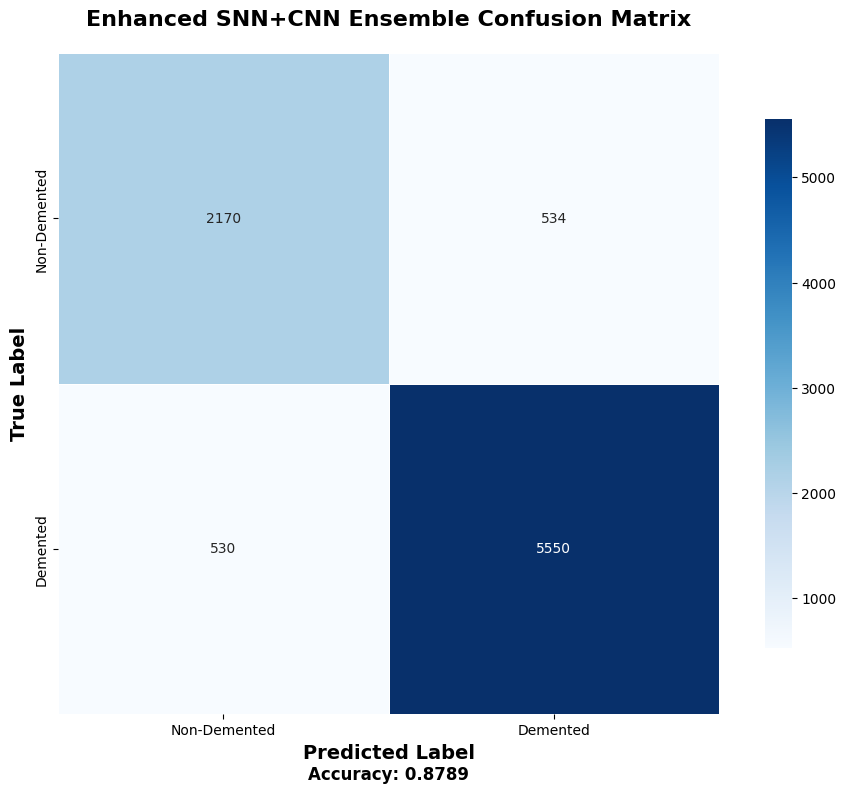

Displayed: Enhanced SNN+CNN Ensemble Confusion Matrix


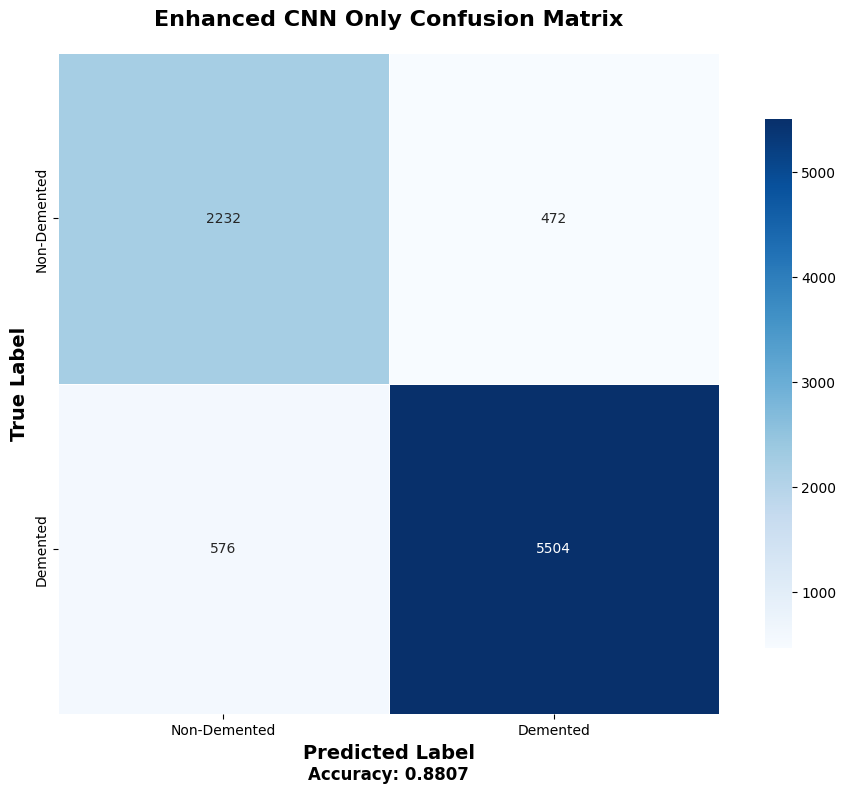

Displayed: Enhanced CNN Only Confusion Matrix


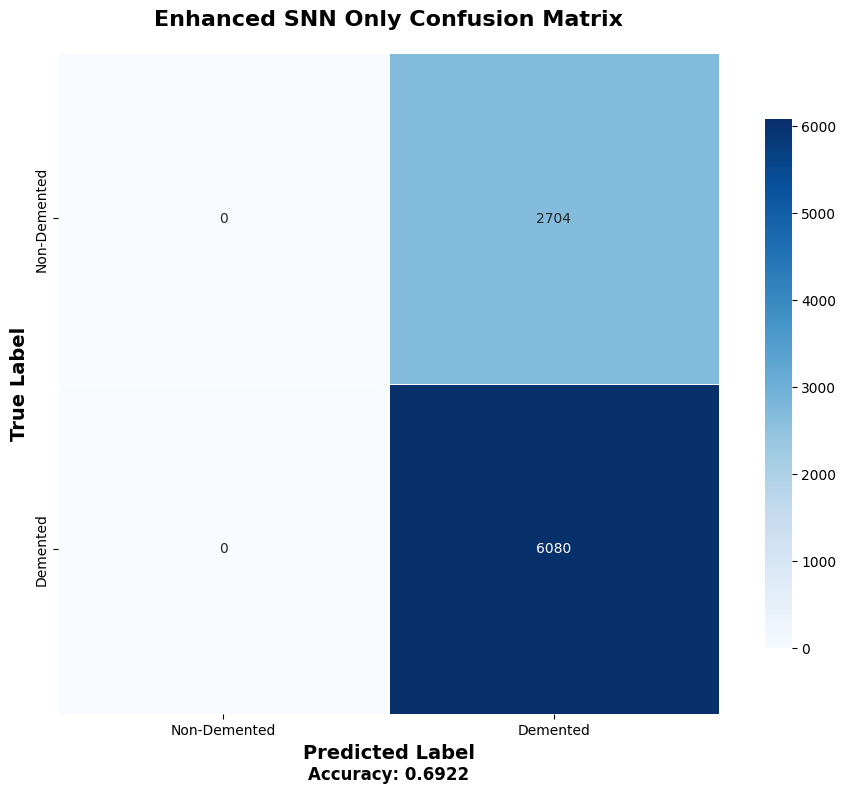

Displayed: Enhanced SNN Only Confusion Matrix


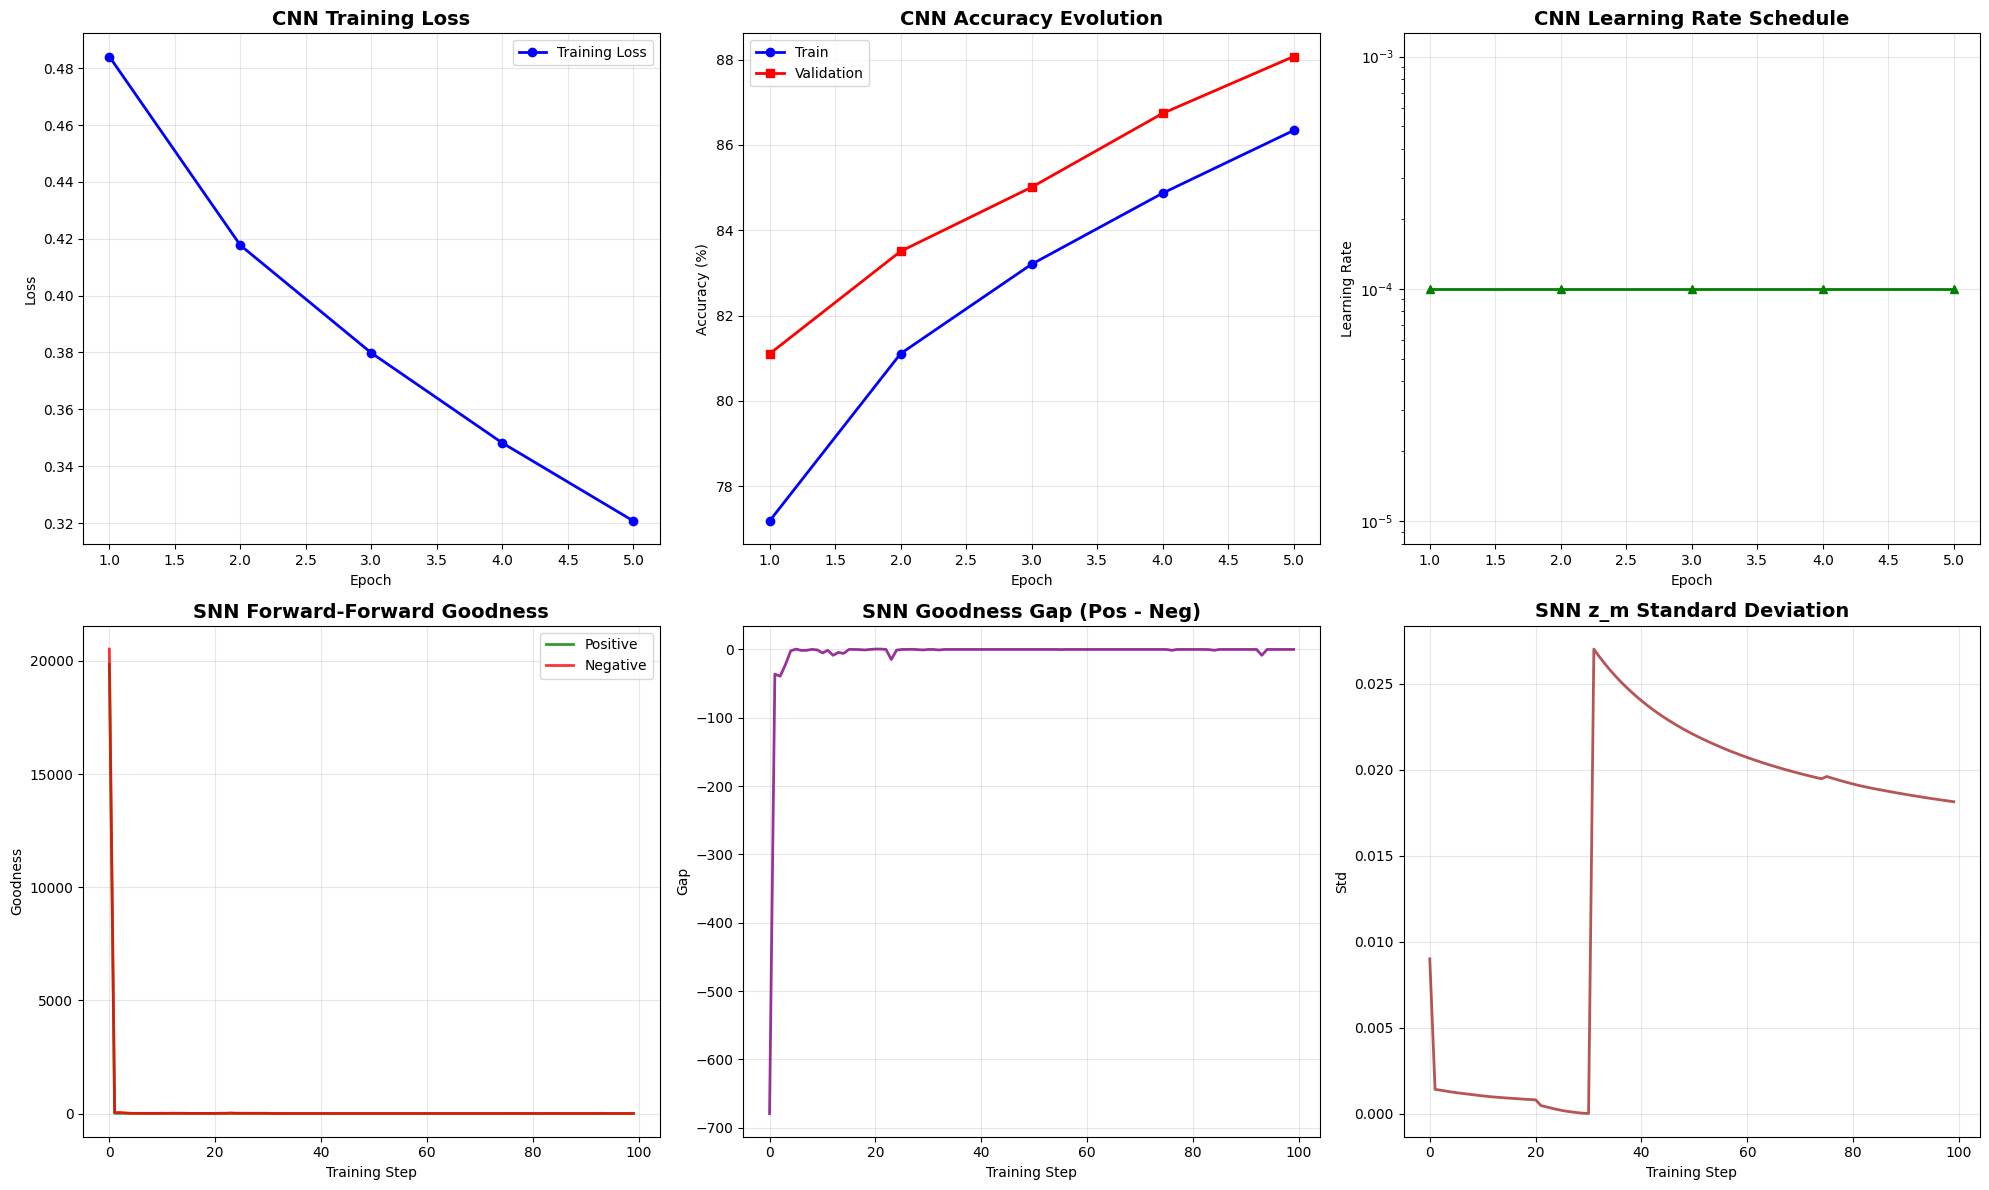

Displayed: Enhanced Training History


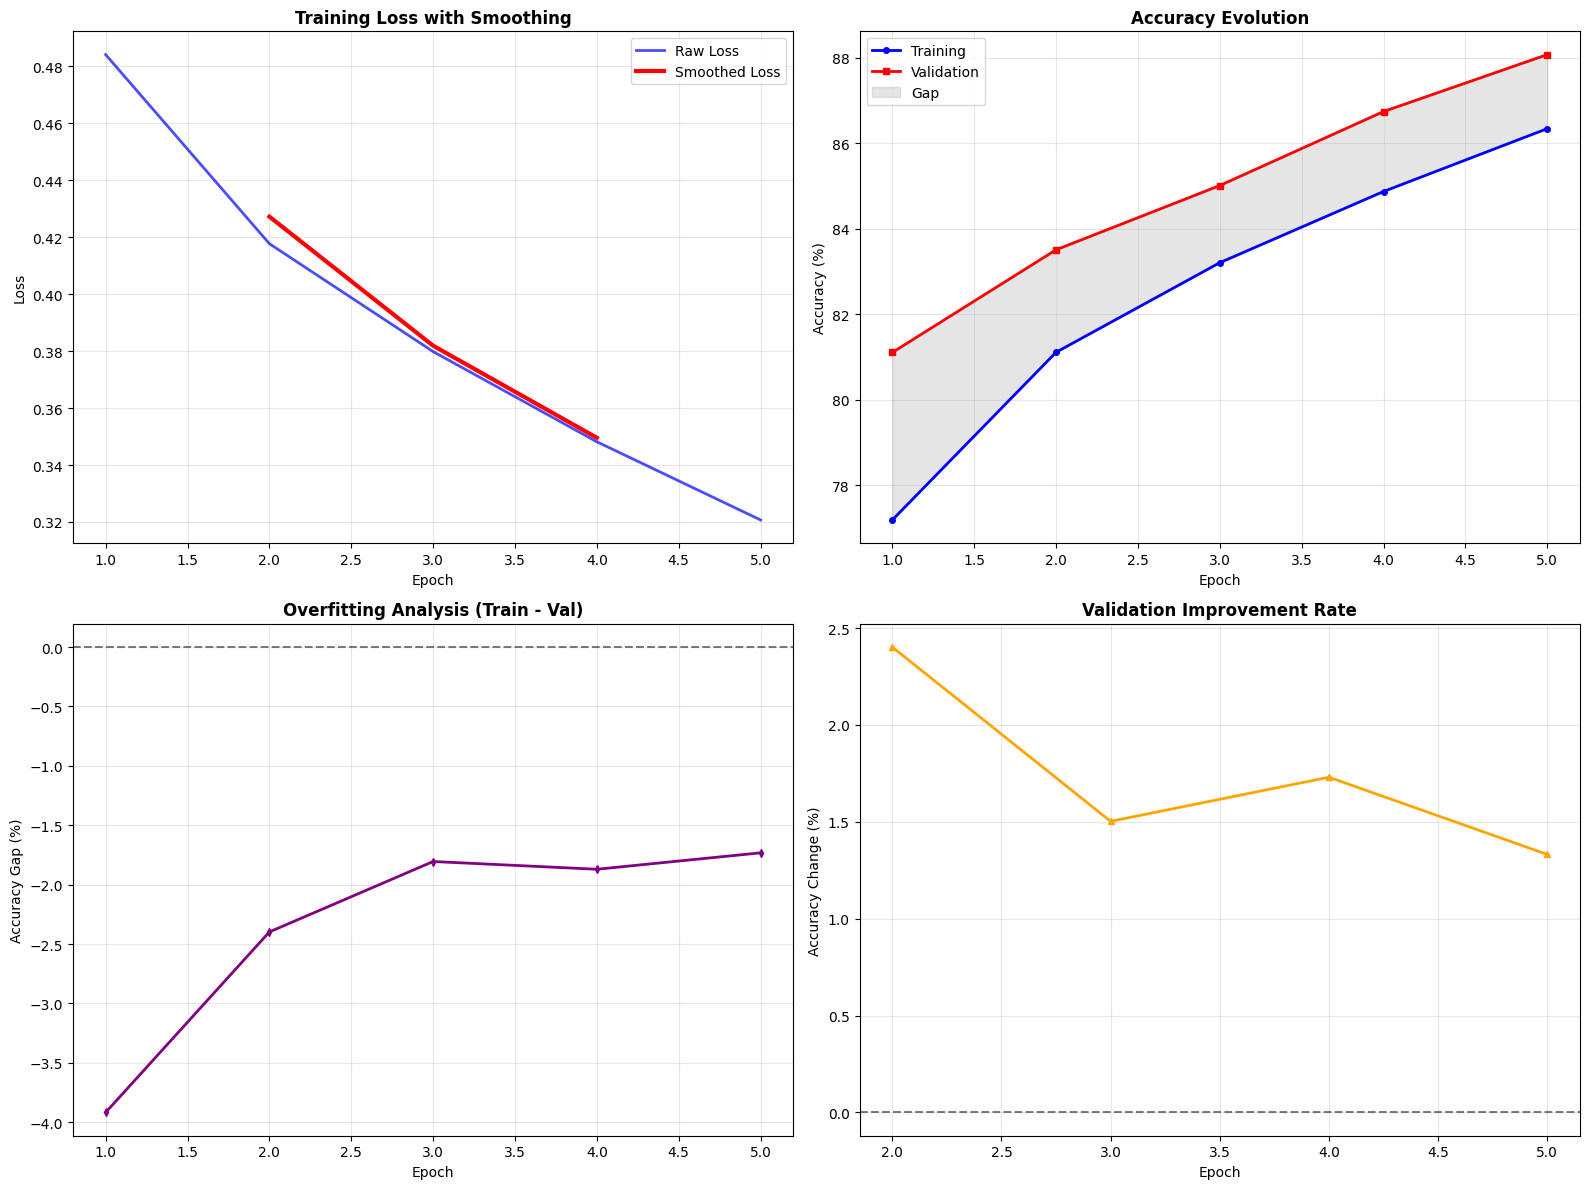

Displayed: Detailed Learning Curves


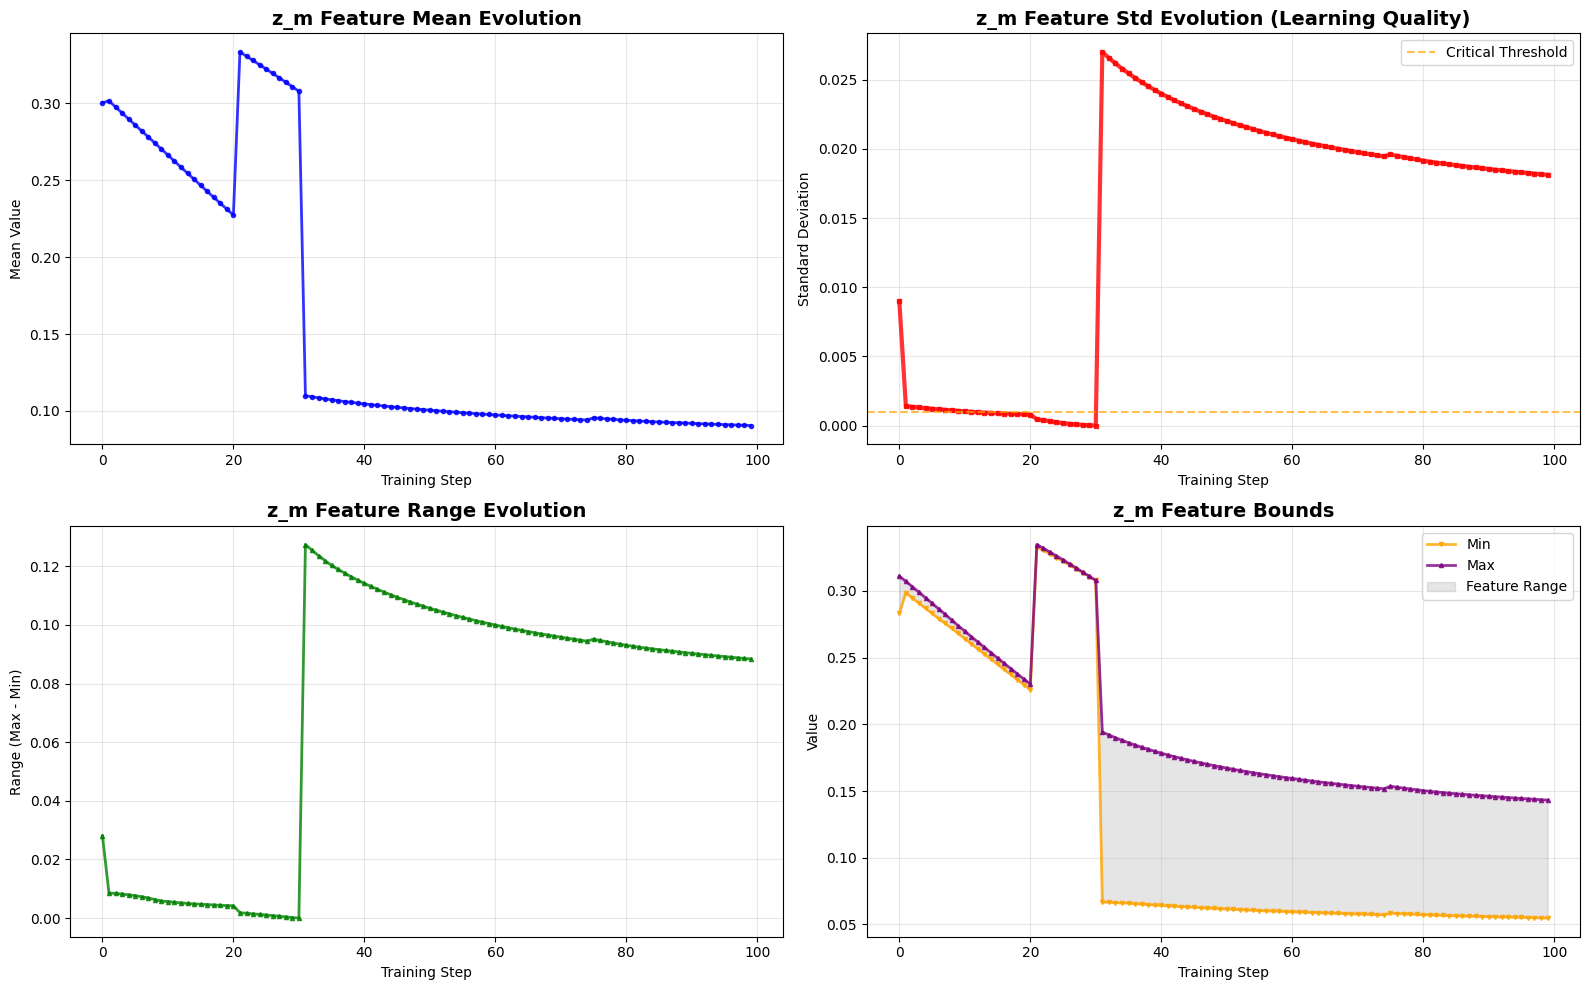

Displayed: z_m Feature Evolution Analysis
z_m Evolution Summary:
  - Final Std: 0.018127
  - Max Std: 0.027005
  - Learning Quality: GOOD


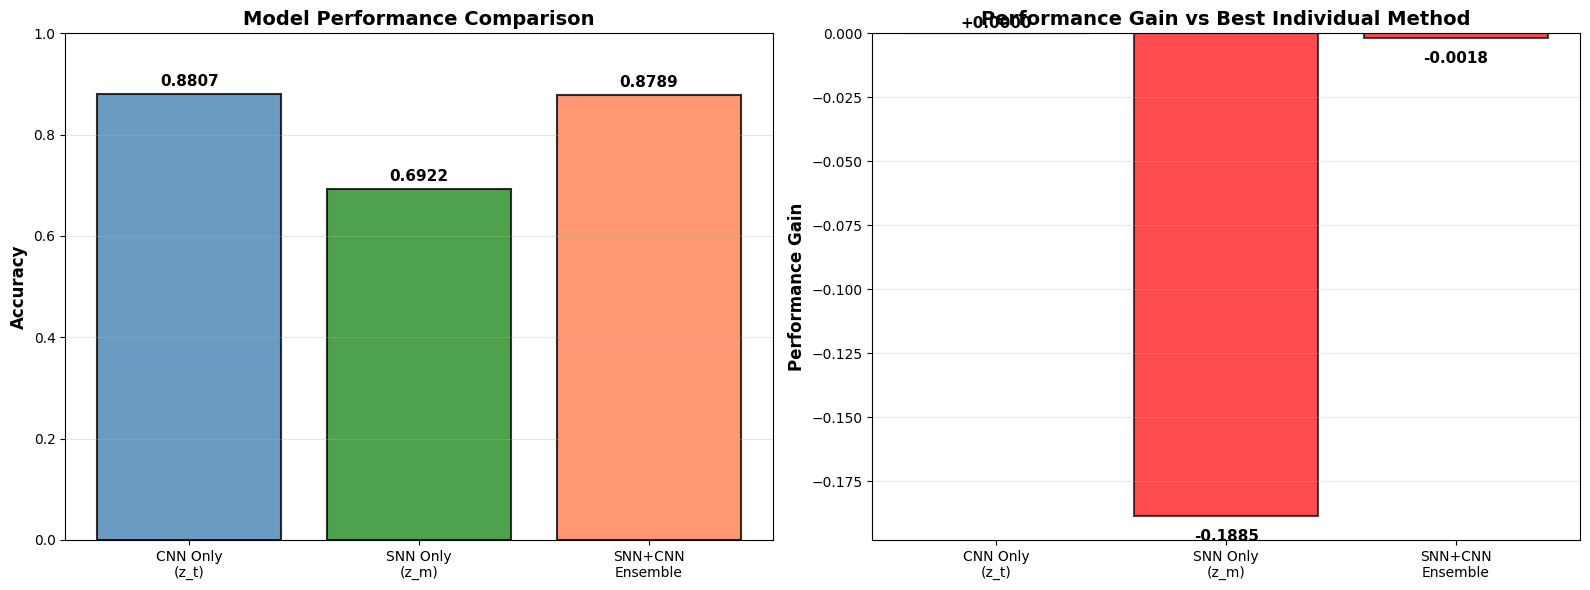

Displayed: Enhanced Metrics Comparison


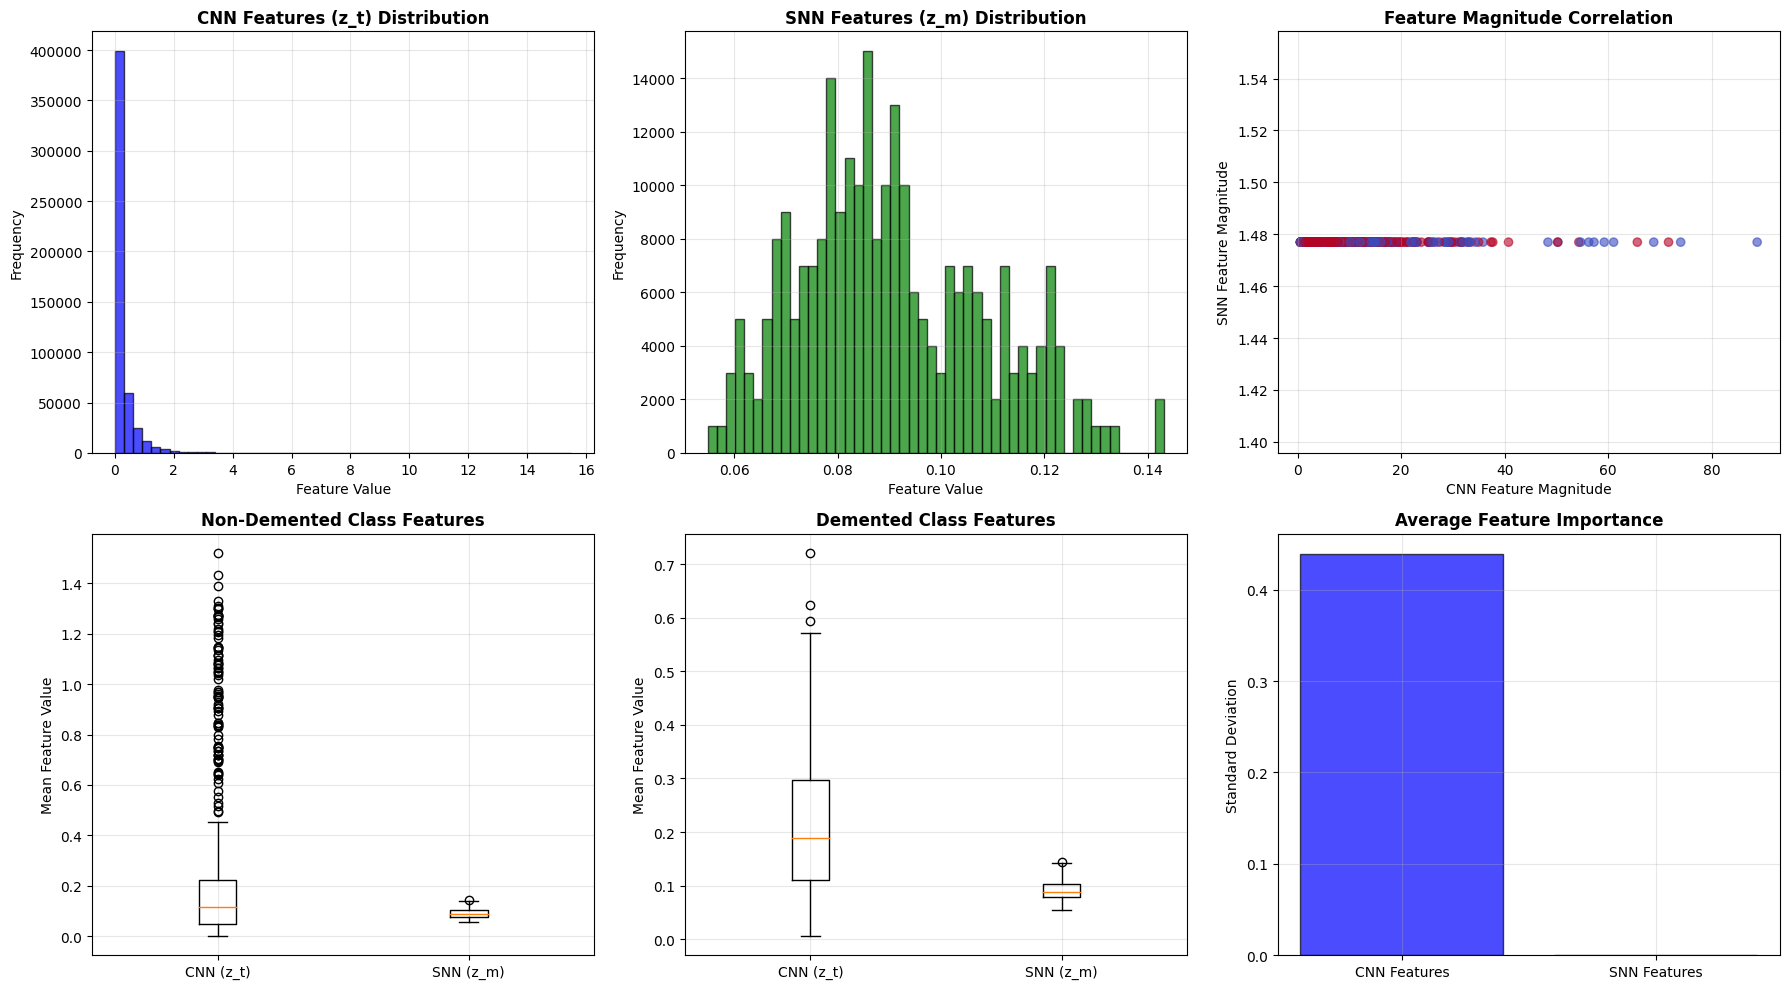

Displayed: Feature Analysis

=== STEP 8: Saving Enhanced Results ===

ENHANCED DUAL-BRANCH FEATURE ENSEMBLE WITH z_m EVOLUTION PLOTTING COMPLETED!
✓ ENHANCED Configuration:
  - CNN Epochs: 5, SNN Epochs: 10
  - Dataset: 2000 train + 500 test = 40384 total
  - Batch size: 8 (more batches per epoch)
  - Feature extraction: ALL samples used (no limits)
  - Perfect feature matching: NO dimension errors
  - Real-time plotting: Confusion matrices, training curves, z_m evolution

✓ Architecture:
  - CNN: ResNet50 → 512D features (z_t)
  - SNN: 4096D → 512 → 256 → 256D features (z_m)
  - Fused: 768D → Enhanced Ensemble

✓ NEW z_m Feature Evolution Tracking:
  - z_m mean, std, min, max evolution plots
  - Learning quality indicators
  - Feature diversity analysis

✓ Files saved:
  - Models: best_cnn_model.pth, best_snn_model.pth
  - Results: enhanced_dual_branch_results.pth

✓ FINAL ENHANCED PERFORMANCE:
  - CNN Only (z_t): 0.8807
  - SNN Only (z_m): 0.6922
  - SNN+CNN Ensemble: 0.8789
  - Best

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, 
                           f1_score, precision_score, recall_score, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set device and hyperparameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# INCREASED Hyperparameters for Better Performance
IMG_SIZE = 224  # For CNN input  
NEURO_IMG_SIZE = 32  # For SNN - Keep small for speed but effective
TIME_STEPS = 20
BATCH_SIZE = 8  # INCREASED from 64 to 32 for more batches
CNN_EPOCHS = 5  # INCREASED from 4 to 8
SNN_EPOCHS = 10 # INCREASED from 4 to 8
CNN_LR = 0.0001
SNN_LR = 0.008
CNN_FEATURE_DIM = 512
SNN_FEATURE_DIM = 256  # Keep reasonable size
SUBSET_SIZE = 2000  # BACK to 2000 samples
TEST_SIZE = 500  # INCREASED test size

print(f"INCREASED Configuration:")
print(f"- Dataset size: {SUBSET_SIZE} train, {TEST_SIZE} test")
print(f"- Batch size: {BATCH_SIZE}")
print(f"- CNN epochs: {CNN_EPOCHS}, SNN epochs: {SNN_EPOCHS}")
print(f"- SNN uses {NEURO_IMG_SIZE}x{NEURO_IMG_SIZE} = {NEURO_IMG_SIZE*NEURO_IMG_SIZE*4} neuromorphic features")
print(f"- Feature extraction: ALL available samples (no limits)")

# ------------------------ ENHANCED PLOTTING FUNCTIONS ------------------------
def plot_confusion_matrix(cm, title='Confusion Matrix', class_names=['Non-Demented', 'Demented']):
    """Plot confusion matrix with enhanced visualization"""
    plt.figure(figsize=(10, 8))
    
    # Create heatmap with custom colors
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    
    # Add accuracy text
    accuracy = np.trace(cm) / float(np.sum(cm))
    plt.text(0.5, -0.1, f'Accuracy: {accuracy:.4f}', 
             horizontalalignment='center', fontsize=12, fontweight='bold',
             transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()  # Display instead of saving
    print(f"Displayed: {title}")

def plot_zm_feature_evolution(snn_stats):
    """Plot detailed z_m feature evolution during SNN training"""
    if not snn_stats or 'z_m_stats' not in snn_stats or not snn_stats['z_m_stats']:
        print("No z_m statistics available for plotting")
        return
    
    # Extract z_m statistics
    z_m_means = [stats[0] for stats in snn_stats['z_m_stats']]
    z_m_stds = [stats[1] for stats in snn_stats['z_m_stats']]
    z_m_mins = [stats[2] for stats in snn_stats['z_m_stats']]
    z_m_maxs = [stats[3] for stats in snn_stats['z_m_stats']]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    steps = range(len(z_m_means))
    
    # z_m mean evolution
    axes[0][0].plot(steps, z_m_means, 'blue', linewidth=2, alpha=0.8, marker='o', markersize=3)
    axes[0][0].set_title('z_m Feature Mean Evolution', fontweight='bold', fontsize=14)
    axes[0][0].set_xlabel('Training Step')
    axes[0][0].set_ylabel('Mean Value')
    axes[0][0].grid(True, alpha=0.3)
    
    # z_m standard deviation evolution (most important!)
    axes[0][1].plot(steps, z_m_stds, 'red', linewidth=3, alpha=0.8, marker='s', markersize=3)
    axes[0][1].set_title('z_m Feature Std Evolution (Learning Quality)', fontweight='bold', fontsize=14)
    axes[0][1].set_xlabel('Training Step')
    axes[0][1].set_ylabel('Standard Deviation')
    axes[0][1].grid(True, alpha=0.3)
    # Add horizontal line at critical threshold
    axes[0][1].axhline(y=0.001, color='orange', linestyle='--', alpha=0.7, label='Critical Threshold')
    axes[0][1].legend()
    
    # z_m range evolution (max - min)
    z_m_ranges = [max_val - min_val for max_val, min_val in zip(z_m_maxs, z_m_mins)]
    axes[1][0].plot(steps, z_m_ranges, 'green', linewidth=2, alpha=0.8, marker='^', markersize=3)
    axes[1][0].set_title('z_m Feature Range Evolution', fontweight='bold', fontsize=14)
    axes[1][0].set_xlabel('Training Step')
    axes[1][0].set_ylabel('Range (Max - Min)')
    axes[1][0].grid(True, alpha=0.3)
    
    # z_m min/max bounds
    axes[1][1].plot(steps, z_m_mins, 'orange', linewidth=2, alpha=0.8, label='Min', marker='v', markersize=3)
    axes[1][1].plot(steps, z_m_maxs, 'purple', linewidth=2, alpha=0.8, label='Max', marker='^', markersize=3)
    axes[1][1].fill_between(steps, z_m_mins, z_m_maxs, alpha=0.2, color='gray', label='Feature Range')
    axes[1][1].set_title('z_m Feature Bounds', fontweight='bold', fontsize=14)
    axes[1][1].set_xlabel('Training Step')
    axes[1][1].set_ylabel('Value')
    axes[1][1].legend()
    axes[1][1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    print("Displayed: z_m Feature Evolution Analysis")
    
    # Print summary statistics
    final_std = z_m_stds[-1] if z_m_stds else 0
    max_std = max(z_m_stds) if z_m_stds else 0
    print(f"z_m Evolution Summary:")
    print(f"  - Final Std: {final_std:.6f}")
    print(f"  - Max Std: {max_std:.6f}")
    print(f"  - Learning Quality: {'GOOD' if final_std > 0.001 else 'NEEDS IMPROVEMENT'}")

def plot_training_history(cnn_losses, cnn_train_accs, cnn_val_accs, snn_stats=None):
    """Enhanced training history plotting"""
    if snn_stats is not None:
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    else:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes = [axes]  # Make it compatible with indexing
    
    # CNN Loss
    axes[0][0].plot(range(1, len(cnn_losses) + 1), cnn_losses, 'b-', linewidth=2, marker='o')
    axes[0][0].set_title('CNN Training Loss', fontsize=14, fontweight='bold')
    axes[0][0].set_xlabel('Epoch')
    axes[0][0].set_ylabel('Loss')
    axes[0][0].grid(True, alpha=0.3)
    axes[0][0].legend(['Training Loss'])
    
    # CNN Accuracy
    epochs = range(1, len(cnn_train_accs) + 1)
    axes[0][1].plot(epochs, cnn_train_accs, 'b-', linewidth=2, marker='o', label='Train')
    axes[0][1].plot(epochs, cnn_val_accs, 'r-', linewidth=2, marker='s', label='Validation')
    axes[0][1].set_title('CNN Accuracy Evolution', fontsize=14, fontweight='bold')
    axes[0][1].set_xlabel('Epoch')
    axes[0][1].set_ylabel('Accuracy (%)')
    axes[0][1].legend()
    axes[0][1].grid(True, alpha=0.3)
    
    # Learning Rate Schedule
    axes[0][2].plot(epochs, [CNN_LR] * len(epochs), 'g-', linewidth=2, marker='^')
    axes[0][2].set_title('CNN Learning Rate Schedule', fontsize=14, fontweight='bold')
    axes[0][2].set_xlabel('Epoch')
    axes[0][2].set_ylabel('Learning Rate')
    axes[0][2].grid(True, alpha=0.3)
    axes[0][2].set_yscale('log')
    
    # SNN Training Progress (if available)
    if snn_stats is not None:
        # Goodness evolution
        axes[1][0].plot(snn_stats['ff_pos'], 'g-', linewidth=2, label='Positive', alpha=0.8)
        axes[1][0].plot(snn_stats['ff_neg'], 'r-', linewidth=2, label='Negative', alpha=0.8)
        axes[1][0].set_title('SNN Forward-Forward Goodness', fontsize=14, fontweight='bold')
        axes[1][0].set_xlabel('Training Step')
        axes[1][0].set_ylabel('Goodness')
        axes[1][0].legend()
        axes[1][0].grid(True, alpha=0.3)
        
        # Goodness gap
        goodness_gap = [p - n for p, n in zip(snn_stats['ff_pos'], snn_stats['ff_neg'])]
        axes[1][1].plot(goodness_gap, 'purple', linewidth=2, alpha=0.8)
        axes[1][1].set_title('SNN Goodness Gap (Pos - Neg)', fontsize=14, fontweight='bold')
        axes[1][1].set_xlabel('Training Step')
        axes[1][1].set_ylabel('Gap')
        axes[1][1].grid(True, alpha=0.3)
        
        # z_m standard deviation
        if snn_stats['z_m_stats']:
            zm_stds = [stats[1] for stats in snn_stats['z_m_stats']]
            axes[1][2].plot(zm_stds, 'brown', linewidth=2, alpha=0.8)
            axes[1][2].set_title('SNN z_m Standard Deviation', fontsize=14, fontweight='bold')
            axes[1][2].set_xlabel('Training Step')
            axes[1][2].set_ylabel('Std')
            axes[1][2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()  # Display instead of saving
    print("Displayed: Enhanced Training History")

def plot_metrics_comparison(cnn_only_acc, snn_only_acc, ensemble_acc):
    """Enhanced metrics comparison with detailed visualization"""
    methods = ['CNN Only\n(z_t)', 'SNN Only\n(z_m)', 'SNN+CNN\nEnsemble']
    accuracies = [cnn_only_acc, snn_only_acc, ensemble_acc]
    colors = ['steelblue', 'forestgreen', 'coral']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot
    bars = ax1.bar(methods, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylim([0, 1])
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Performance gain analysis
    best_individual = max(cnn_only_acc, snn_only_acc)
    ensemble_gain = ensemble_acc - best_individual
    
    gains = [cnn_only_acc - best_individual, snn_only_acc - best_individual, ensemble_gain]
    colors_gain = ['red' if g < 0 else 'green' for g in gains]
    
    bars2 = ax2.bar(methods, gains, color=colors_gain, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax2.set_ylabel('Performance Gain', fontsize=12, fontweight='bold')
    ax2.set_title('Performance Gain vs Best Individual Method', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # Add value labels on gain bars
    for bar, gain in zip(bars2, gains):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + (0.001 if height >= 0 else -0.005), 
                f'{gain:+.4f}', ha='center', va='bottom' if height >= 0 else 'top', 
                fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()  # Display instead of saving
    print("Displayed: Enhanced Metrics Comparison")

def plot_feature_analysis(z_t, z_m, labels, sample_size=1000):
    """Analyze and visualize feature distributions"""
    if len(z_t) > sample_size:
        indices = np.random.choice(len(z_t), sample_size, replace=False)
        z_t_sample = z_t[indices]
        z_m_sample = z_m[indices]
        labels_sample = labels[indices]
    else:
        z_t_sample, z_m_sample, labels_sample = z_t, z_m, labels
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # CNN features distribution
    axes[0][0].hist(z_t_sample.numpy().flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes[0][0].set_title('CNN Features (z_t) Distribution', fontweight='bold')
    axes[0][0].set_xlabel('Feature Value')
    axes[0][0].set_ylabel('Frequency')
    axes[0][0].grid(True, alpha=0.3)
    
    # SNN features distribution
    axes[0][1].hist(z_m_sample.numpy().flatten(), bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[0][1].set_title('SNN Features (z_m) Distribution', fontweight='bold')
    axes[0][1].set_xlabel('Feature Value')
    axes[0][1].set_ylabel('Frequency')
    axes[0][1].grid(True, alpha=0.3)
    
    # Feature magnitude comparison
    z_t_magnitudes = torch.norm(z_t_sample, dim=1).numpy()
    z_m_magnitudes = torch.norm(z_m_sample, dim=1).numpy()
    
    axes[0][2].scatter(z_t_magnitudes, z_m_magnitudes, alpha=0.6, c=labels_sample, cmap='coolwarm')
    axes[0][2].set_title('Feature Magnitude Correlation', fontweight='bold')
    axes[0][2].set_xlabel('CNN Feature Magnitude')
    axes[0][2].set_ylabel('SNN Feature Magnitude')
    axes[0][2].grid(True, alpha=0.3)
    
    # Feature statistics by class
    for class_idx in [0, 1]:
        class_mask = labels_sample == class_idx
        class_name = 'Non-Demented' if class_idx == 0 else 'Demented'
        
        z_t_class = z_t_sample[class_mask]
        z_m_class = z_m_sample[class_mask]
        
        axes[1][class_idx].boxplot([z_t_class.mean(dim=0).numpy(), z_m_class.mean(dim=0).numpy()], 
                                   labels=['CNN (z_t)', 'SNN (z_m)'])
        axes[1][class_idx].set_title(f'{class_name} Class Features', fontweight='bold')
        axes[1][class_idx].set_ylabel('Mean Feature Value')
        axes[1][class_idx].grid(True, alpha=0.3)
    
    # Overall feature comparison
    fused_features = torch.cat([z_t_sample, z_m_sample], dim=1)
    feature_importance = torch.std(fused_features, dim=0).numpy()
    
    cnn_importance = feature_importance[:z_t_sample.shape[1]]
    snn_importance = feature_importance[z_t_sample.shape[1]:]
    
    axes[1][2].bar(['CNN Features', 'SNN Features'], 
                   [np.mean(cnn_importance), np.mean(snn_importance)], 
                   color=['blue', 'green'], alpha=0.7, edgecolor='black')
    axes[1][2].set_title('Average Feature Importance', fontweight='bold')
    axes[1][2].set_ylabel('Standard Deviation')
    axes[1][2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()  # Display instead of saving
    print("Displayed: Feature Analysis")

def plot_learning_curves_detailed(train_losses, train_accs, val_accs, snn_stats=None):
    """Detailed learning curves with additional metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    epochs = range(1, len(train_losses) + 1)
    
    # Loss curve with smoothing
    axes[0][0].plot(epochs, train_losses, 'b-', linewidth=2, alpha=0.7, label='Raw Loss')
    if len(train_losses) > 3:
        # Simple moving average
        smoothed_loss = np.convolve(train_losses, np.ones(3)/3, mode='valid')
        smoothed_epochs = range(2, len(train_losses))
        axes[0][0].plot(smoothed_epochs, smoothed_loss, 'r-', linewidth=3, label='Smoothed Loss')
    axes[0][0].set_title('Training Loss with Smoothing', fontweight='bold')
    axes[0][0].set_xlabel('Epoch')
    axes[0][0].set_ylabel('Loss')
    axes[0][0].legend()
    axes[0][0].grid(True, alpha=0.3)
    
    # Accuracy curves
    axes[0][1].plot(epochs, train_accs, 'b-', linewidth=2, marker='o', label='Training', markersize=4)
    axes[0][1].plot(epochs, val_accs, 'r-', linewidth=2, marker='s', label='Validation', markersize=4)
    axes[0][1].fill_between(epochs, train_accs, val_accs, alpha=0.2, color='gray', label='Gap')
    axes[0][1].set_title('Accuracy Evolution', fontweight='bold')
    axes[0][1].set_xlabel('Epoch')
    axes[0][1].set_ylabel('Accuracy (%)')
    axes[0][1].legend()
    axes[0][1].grid(True, alpha=0.3)
    
    # Overfitting analysis
    overfitting_gap = [train - val for train, val in zip(train_accs, val_accs)]
    axes[1][0].plot(epochs, overfitting_gap, 'purple', linewidth=2, marker='d', markersize=4)
    axes[1][0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1][0].set_title('Overfitting Analysis (Train - Val)', fontweight='bold')
    axes[1][0].set_xlabel('Epoch')
    axes[1][0].set_ylabel('Accuracy Gap (%)')
    axes[1][0].grid(True, alpha=0.3)
    
    # Performance improvement rate
    if len(val_accs) > 1:
        improvement_rate = [val_accs[i] - val_accs[i-1] for i in range(1, len(val_accs))]
        axes[1][1].plot(range(2, len(val_accs) + 1), improvement_rate, 'orange', 
                       linewidth=2, marker='^', markersize=4)
        axes[1][1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        axes[1][1].set_title('Validation Improvement Rate', fontweight='bold')
        axes[1][1].set_xlabel('Epoch')
        axes[1][1].set_ylabel('Accuracy Change (%)')
        axes[1][1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()  # Display instead of saving
    print("Displayed: Detailed Learning Curves")

# ------------------------ ADVANCED PREPROCESSING ------------------------
def apply_advanced_preprocessing(image_path):
    """Complete advanced preprocessing pipeline from your original code"""
    try:
        if isinstance(image_path, str):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        else:
            image = image_path
            
        if image is None:
            return None
            
        # Don't resize here - keep original size for preprocessing
        original_size = image.shape
        
        # 1. Noise reduction with bilateral filter
        denoised = cv2.bilateralFilter(image, 9, 75, 75)
        
        # 2. Median filtering
        median_filtered = cv2.medianBlur(denoised, 5)
        
        # 3. Gaussian blur
        gaussian_blurred = cv2.GaussianBlur(median_filtered, (3, 3), 0)
        
        # 4. Histogram equalization
        equalized = cv2.equalizeHist(gaussian_blurred)
        
        # 5. CLAHE
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        clahe_applied = clahe.apply(equalized)
        
        # 6. Unsharp masking
        gaussian_3 = cv2.GaussianBlur(clahe_applied, (0, 0), 2.0)
        unsharp_mask = cv2.addWeighted(clahe_applied, 1.5, gaussian_3, -0.5, 0)
        
        # 7. Morphological operations
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
        opened = cv2.morphologyEx(unsharp_mask, cv2.MORPH_OPEN, kernel)
        closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
        
        # 8. Edge-preserving filter
        edge_preserved = cv2.edgePreservingFilter(closed, flags=1, sigma_s=50, sigma_r=0.4)
        
        # 9. Gradient enhancement
        grad_x = cv2.Sobel(edge_preserved, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(edge_preserved, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
        gradient_magnitude = np.uint8(gradient_magnitude / gradient_magnitude.max() * 255)
        
        # 10. Combine with gradient
        enhanced = cv2.addWeighted(edge_preserved, 0.8, gradient_magnitude, 0.2, 0)
        
        # 11. Final normalization
        normalized = cv2.normalize(enhanced, None, 0, 255, cv2.NORM_MINMAX)
        
        return normalized
        
    except Exception as e:
        print(f"Error in advanced preprocessing: {e}")
        return None

# ------------------------ DATASET CLASS ------------------------
class AlzheimerDataset(Dataset):
    """Dataset class with advanced preprocessing"""
    def __init__(self, dataframe, transform=None, use_advanced_preprocessing=True):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
        self.use_advanced_preprocessing = use_advanced_preprocessing

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.loc[idx, 'image']
        label = self.df.loc[idx, 'label_idx']
        
        try:
            if self.use_advanced_preprocessing:
                processed_img = apply_advanced_preprocessing(image_path)
                if processed_img is not None:
                    image = Image.fromarray(processed_img).convert('RGB')
                else:
                    image = Image.open(image_path).convert('RGB')
            else:
                image = Image.open(image_path).convert('RGB')
        except:
            image = Image.new('RGB', (IMG_SIZE, IMG_SIZE), color='gray')
            
        if self.transform:
            image = self.transform(image)
        return image, label

# ------------------------ NEUROMORPHIC PREPROCESSING (YOUR ORIGINAL SIZE) ------------------------
class NeuromorphicSingleEncodingPreprocessor:
    """Neuromorphic preprocessor - keeping your original approach with 32x32 size"""
    def __init__(self, time_steps=20, img_size=32):
        self.time_steps = time_steps
        self.img_size = img_size
        print(f"Neuromorphic Preprocessor: {img_size}x{img_size} → {img_size*img_size*4} features")
    
    def skull_strip_brain_scan(self, image_tensor):
        """Brain scan preprocessing with your original approach"""
        device = image_tensor.device
        batch_size = image_tensor.shape[0]
        processed_images = []
        
        for i in range(batch_size):
            # Handle RGB images by converting to grayscale and resize to neuromorphic size
            if len(image_tensor.shape) == 4 and image_tensor.shape[1] == 3:
                img = image_tensor[i].mean(dim=0).cpu().numpy()  # Convert to grayscale
                img_8bit = (img * 255).astype(np.uint8)
                # Resize to neuromorphic size
                img_resized = cv2.resize(img_8bit, (self.img_size, self.img_size))
            else:
                img = image_tensor[i].cpu().numpy().reshape(self.img_size, self.img_size)
                img_resized = (img * 255).astype(np.uint8)
            
            # Apply advanced preprocessing
            advanced_processed = apply_advanced_preprocessing(img_resized)
            
            if advanced_processed is None:
                # Fallback processing
                blurred = cv2.GaussianBlur(img_resized, (5, 5), 0)
                _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
                cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
                cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
                
                contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    largest_contour = max(contours, key=cv2.contourArea)
                    mask = np.zeros_like(img_resized)
                    cv2.drawContours(mask, [largest_contour], -1, 255, -1)
                    skull_stripped = cv2.bitwise_and(img_resized, mask)
                else:
                    skull_stripped = img_resized
                
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
                enhanced = clahe.apply(skull_stripped)
                processed_img = torch.from_numpy(enhanced / 255.0).float().to(device)
            else:
                processed_img = torch.from_numpy(advanced_processed / 255.0).float().to(device)
            
            processed_images.append(processed_img.flatten())
        
        return torch.stack(processed_images, dim=0)
    
    def neuromorphic_temporal_encoding(self, data):
        """Temporal spike encoding"""
        device = data.device
        batch_size, features = data.shape
        
        data_norm = torch.clamp(data, 0, 1)
        spikes = torch.zeros(self.time_steps, batch_size, features, device=device)
        
        for b in range(batch_size):
            for f in range(features):
                intensity = data_norm[b, f].item()
                if intensity > 0.1:  # Threshold for spiking
                    spike_time = int((1 - intensity) * (self.time_steps - 1))
                    spike_time = max(0, min(spike_time, self.time_steps - 1))
                    spikes[spike_time, b, f] = 1.0
                    
                    if intensity > 0.8 and spike_time + 1 < self.time_steps:
                        spikes[spike_time + 1, b, f] = 0.5
        
        return spikes
    
    def extract_neuromorphic_features(self, spikes):
        """Extract temporal features - your original 4 features per pixel approach"""
        features = []
        
        # Basic temporal statistics (4 features per pixel - your original approach)
        features.append(spikes.mean(dim=0))    # Average activity
        features.append(spikes.sum(dim=0))     # Total spike count  
        features.append(spikes.std(dim=0))     # Temporal variability
        features.append(spikes.max(dim=0)[0])  # Peak activity
        
        # Total: 4 features per pixel = 32×32×4 = 4,096 features
        return torch.cat(features, dim=1)
    
    def __call__(self, batch_data, add_noise=False):
        """Neuromorphic preprocessing pipeline"""
        device = batch_data.device
        skull_stripped = self.skull_strip_brain_scan(batch_data)
        temporal_spikes = self.neuromorphic_temporal_encoding(skull_stripped)
        temporal_features = self.extract_neuromorphic_features(temporal_spikes)
        combined_features = temporal_features
        
        # Ensure numerical stability
        combined_features = torch.nan_to_num(combined_features, 0.0)
        combined_features = torch.clamp(combined_features, -10, 10)
        
        if add_noise:
            noise = torch.randn_like(combined_features) * 0.02
            noisy_features = combined_features + noise
            return noisy_features, combined_features
        
        return combined_features, combined_features

# ------------------------ SNN AUTOENCODER (YOUR ORIGINAL APPROACH) ------------------------
class ForwardForwardRSTDPAutoencoder(nn.Module):
    """Forward-Forward RSTDP Autoencoder - your original approach with reasonable size"""
    def __init__(self, input_size, time_steps, latent_dim=256):
        super(ForwardForwardRSTDPAutoencoder, self).__init__()
        self.input_size = input_size
        self.time_steps = time_steps
        self.latent_dim = latent_dim
        
        # Keep your original architecture sizes but reasonable
        self.encoder1 = nn.Linear(input_size, 512, bias=True)     # Your original size
        self.encoder2 = nn.Linear(512, 256, bias=True)           # Your original size
        self.bottleneck = nn.Linear(256, self.latent_dim, bias=True)
        
        self.decoder1 = nn.Linear(self.latent_dim, 256, bias=True)
        self.decoder2 = nn.Linear(256, 512, bias=True)
        self.decoder3 = nn.Linear(512, input_size, bias=True)
        
        self.threshold = 1.5
        self.ff_learning_rate = 0.01  # Your original rate
        self.tau_pre = 20.0
        self.tau_post = 20.0
        self.A_plus = 0.02
        self.A_minus = 0.01
        
        self.reward_baseline = 0.0
        self.reward_lr = 0.2
        
        self.layer_norms = [0.3, 0.25, 0.2]
        self.init_weights_aggressive()
        
        print(f"SNN Architecture: {input_size} → 512 → 256 → {self.latent_dim}(z_m) → 256 → 512 → {input_size}")
        print(f"FF Learning Rate: {self.ff_learning_rate}")
    
    def init_weights_aggressive(self):
        for i, layer in enumerate([self.encoder1, self.encoder2, self.bottleneck]):
            nn.init.normal_(layer.weight, mean=0.0, std=self.layer_norms[i])
            if layer.bias is not None:
                nn.init.normal_(layer.bias, mean=0.0, std=0.1)
        
        for layer in [self.decoder1, self.decoder2, self.decoder3]:
            nn.init.normal_(layer.weight, mean=0.0, std=0.2)
            if layer.bias is not None:
                nn.init.normal_(layer.bias, mean=0.0, std=0.1)
    
    def encode_to_z_m(self, input_features):
        with torch.no_grad():
            x1 = torch.relu(self.encoder1(input_features))
            x2 = torch.relu(self.encoder2(x1))
            z_m_raw = self.bottleneck(x2)
            z_m = torch.sigmoid(z_m_raw)
            return z_m.detach()
    
    def forward(self, input_features):
        # Encoder
        x1 = torch.relu(self.encoder1(input_features))
        x2 = torch.relu(self.encoder2(x1))
        z_m_raw = self.bottleneck(x2)
        z_m = torch.sigmoid(z_m_raw)
        
        # Decoder
        d1 = torch.relu(self.decoder1(z_m))
        d2 = torch.relu(self.decoder2(d1))
        reconstruction = self.decoder3(d2)
        
        return reconstruction, z_m
    
    def create_positive_negative_samples(self, x, noise_level=0.2):
        batch_size = x.shape[0]
        positive_samples = x.clone()
        negative_samples = x.clone()
        
        # Method 1: Gaussian noise
        noise = torch.randn_like(x) * noise_level * 2.0
        negative_samples += noise
        
        # Method 2: feature shuffling
        for i in range(batch_size):
            n_shuffle = int(0.4 * x.shape[1])
            shuffle_idx = torch.randperm(x.shape[1])[:n_shuffle]
            random_sample_idx = torch.randint(0, batch_size, (1,)).item()
            negative_samples[i, shuffle_idx] = x[random_sample_idx, shuffle_idx]
        
        # Method 3: intensity inversion
        invert_mask = torch.rand_like(x) < 0.2
        negative_samples[invert_mask] = 1.0 - negative_samples[invert_mask]
        
        # Method 4: Add random patterns
        random_mask = torch.rand_like(x) < 0.1
        negative_samples[random_mask] = torch.rand_like(negative_samples[random_mask])
        
        combined_samples = torch.cat([positive_samples, negative_samples], dim=0)
        labels = torch.cat([torch.ones(batch_size), torch.zeros(batch_size)], dim=0)
        
        return combined_samples, labels
    
    def direct_weight_updates(self, features):
        with torch.no_grad():
            x1 = torch.relu(self.encoder1(features))
            if x1.sum() < 1e-6:  # If no activation
                self.encoder1.weight.data += torch.randn_like(self.encoder1.weight) * 0.1
                self.encoder1.bias.data += torch.randn_like(self.encoder1.bias) * 0.1
            
            x2 = torch.relu(self.encoder2(x1))
            if x2.sum() < 1e-6:
                self.encoder2.weight.data += torch.randn_like(self.encoder2.weight) * 0.1
                self.encoder2.bias.data += torch.randn_like(self.encoder2.bias) * 0.1
            
            z_raw = self.bottleneck(x2)
            if z_raw.std() < 1e-6:
                self.bottleneck.weight.data += torch.randn_like(self.bottleneck.weight) * 0.15
                self.bottleneck.bias.data += torch.randn_like(self.bottleneck.bias) * 0.15
    
    def aggressive_ff_update(self, layer, x_pos, x_neg, layer_idx):
        with torch.no_grad():
            # Forward pass
            h_pos = layer(x_pos)
            h_neg = layer(x_neg)
            
            if layer_idx < 2:  # Encoder layers
                h_pos_act = torch.relu(h_pos)
                h_neg_act = torch.relu(h_neg)
            else:  # Bottleneck
                h_pos_act = torch.sigmoid(h_pos)
                h_neg_act = torch.sigmoid(h_neg)
            
            # Compute goodness
            goodness_pos = torch.sum(h_pos_act ** 2, dim=1)
            goodness_neg = torch.sum(h_neg_act ** 2, dim=1)
            
            pos_loss = torch.relu(self.threshold - goodness_pos) ** 2.0
            neg_loss = torch.relu(goodness_neg - self.threshold) ** 2.0
            
            total_grad = torch.zeros_like(layer.weight)
            bias_grad = torch.zeros_like(layer.bias)
            
            # Positive updates
            for i in range(len(x_pos)):
                if pos_loss[i] > 0:
                    grad = torch.outer(h_pos_act[i], x_pos[i]) * pos_loss[i].item()
                    total_grad += grad * 3.0
                    bias_grad += h_pos_act[i] * pos_loss[i].item() * 3.0
            
            # Negative updates
            for i in range(len(x_neg)):
                if neg_loss[i] > 0:
                    grad = torch.outer(h_neg_act[i], x_neg[i]) * neg_loss[i].item()
                    total_grad -= grad * 3.0
                    bias_grad -= h_neg_act[i] * neg_loss[i].item() * 3.0
            
            layer.weight.data += self.ff_learning_rate * total_grad / (len(x_pos) + len(x_neg))
            layer.bias.data += self.ff_learning_rate * bias_grad / (len(x_pos) + len(x_neg))
            
            layer.weight.data = torch.clamp(layer.weight.data, -0.5, 0.5)
            layer.bias.data = torch.clamp(layer.bias.data, -0.3, 0.3)
            
            return goodness_pos.mean(), goodness_neg.mean()
    
    def emergency_weight_boost(self):
        with torch.no_grad():
            self.encoder1.weight.data *= 1.5
            self.encoder1.bias.data += torch.randn_like(self.encoder1.bias) * 0.2
            self.encoder2.weight.data *= 1.5
            self.encoder2.bias.data += torch.randn_like(self.encoder2.bias) * 0.2
            self.bottleneck.weight.data *= 2.0
            self.bottleneck.bias.data += torch.randn_like(self.bottleneck.bias) * 0.3
    
    def train_ff_rstdp_neuromorphic(self, data_loader, preprocessor, epochs=8):
        """Train SNN with INCREASED epochs, but more batches per epoch"""
        print(f"\n=== Enhanced SNN Training ({epochs} epochs, more batches per epoch) ===")
        
        all_stats = {'ff_pos': [], 'ff_neg': [], 'rewards': [], 'z_m_stats': []}
        
        for epoch in range(epochs):
            print(f"\n=== Epoch {epoch+1}/{epochs} ===")
            epoch_stats = {'ff_pos': [], 'ff_neg': [], 'rewards': [], 'z_m_stats': []}
            
            for batch_idx, (data, labels) in enumerate(data_loader):
                if batch_idx >= 10:  # Use more batches per epoch for better training
                    break
                    
                data = data.to(device)
                
                # Get neuromorphic features
                features, _ = preprocessor(data)
                features = features.to(device)
                
                if batch_idx <= 3:
                    self.direct_weight_updates(features)
                
                # Create positive and negative samples
                combined_samples, sample_labels = self.create_positive_negative_samples(features)
                pos_samples = combined_samples[sample_labels == 1]
                neg_samples = combined_samples[sample_labels == 0]
                
                # Forward-Forward training
                current_pos = pos_samples
                current_neg = neg_samples
                
                layers = [self.encoder1, self.encoder2, self.bottleneck]
                batch_goodness_pos = []
                batch_goodness_neg = []
                
                for layer_idx, layer in enumerate(layers):
                    goodness_pos, goodness_neg = self.aggressive_ff_update(
                        layer, current_pos, current_neg, layer_idx
                    )
                    batch_goodness_pos.append(goodness_pos)
                    batch_goodness_neg.append(goodness_neg)
                    
                    with torch.no_grad():
                        if layer_idx < len(layers) - 1:
                            current_pos = torch.relu(layer(current_pos))
                            current_neg = torch.relu(layer(current_neg))
                        else:  # Bottleneck layer
                            current_pos = torch.sigmoid(layer(current_pos))
                            current_neg = torch.sigmoid(layer(current_neg))
                
                # Average goodness across layers
                avg_pos_goodness = torch.stack(batch_goodness_pos).mean().item()
                avg_neg_goodness = torch.stack(batch_goodness_neg).mean().item()
                
                epoch_stats['ff_pos'].append(avg_pos_goodness)
                epoch_stats['ff_neg'].append(avg_neg_goodness)
                all_stats['ff_pos'].append(avg_pos_goodness)
                all_stats['ff_neg'].append(avg_neg_goodness)
                
                with torch.no_grad():
                    test_z_m = self.encode_to_z_m(pos_samples[:4])
                    z_m_mean = test_z_m.mean().item()
                    z_m_std = test_z_m.std().item()
                    z_m_min = test_z_m.min().item()
                    z_m_max = test_z_m.max().item()
                
                epoch_stats['z_m_stats'].append((z_m_mean, z_m_std, z_m_min, z_m_max))
                all_stats['z_m_stats'].append((z_m_mean, z_m_std, z_m_min, z_m_max))
                
                # Compute reconstruction reward
                with torch.no_grad():
                    reconstruction, _ = self.forward(pos_samples)
                    reward_signal = -F.mse_loss(reconstruction, pos_samples).item()
                    epoch_stats['rewards'].append(reward_signal)
                    all_stats['rewards'].append(reward_signal)
                
                if test_z_m.std().item() < 1e-6:
                    self.emergency_weight_boost()
                
                # Print progress
                if batch_idx % 2 == 0:
                    print(f"Batch {batch_idx+1}/10: Pos={avg_pos_goodness:.3f}, Neg={avg_neg_goodness:.3f}, "
                          f"Gap={avg_pos_goodness-avg_neg_goodness:.3f}, z_m_std={z_m_std:.6f}")
            
            # Epoch summary
            if epoch_stats['ff_pos']:
                avg_pos_goodness = np.mean(epoch_stats['ff_pos'])
                avg_neg_goodness = np.mean(epoch_stats['ff_neg'])
                avg_reward = np.mean(epoch_stats['rewards'])
                final_zm_std = epoch_stats['z_m_stats'][-1][1] if epoch_stats['z_m_stats'] else 0
                
                print(f"Epoch {epoch+1} Summary: Pos={avg_pos_goodness:.3f}, Neg={avg_neg_goodness:.3f}, "
                      f"Gap={avg_pos_goodness-avg_neg_goodness:.3f}, z_m_std={final_zm_std:.4f}, Reward={avg_reward:.4f}")
                
                if avg_pos_goodness > avg_neg_goodness and final_zm_std > 0.001:
                    print("✓ SNN learning is working well")
                else:
                    print("⚠ SNN may need adjustment")
        
        # Save model
        torch.save(self.state_dict(), 'best_snn_model.pth')
        print("✓ Enhanced SNN training completed!")
        return all_stats
    
    def get_z_m_batch(self, data_loader, preprocessor):
        """Extract z_m features from ALL available data (no batch limit)"""
        z_m_vectors = []
        labels_list = []
        self.eval()
        
        with torch.no_grad():
            for batch_idx, (data, labels) in enumerate(tqdm(data_loader, desc='Extracting z_m features')):
                # NO BATCH LIMIT - use all available data
                data = data.to(device)
                combined_features, _ = preprocessor(data)
                combined_features = combined_features.to(device)
                z_m = self.encode_to_z_m(combined_features)
                z_m_vectors.append(z_m.cpu())
                labels_list.append(labels)
        
        total_samples = sum(len(batch) for batch in z_m_vectors)
        print(f"SNN extracted z_m from ALL {len(z_m_vectors)} batches = {total_samples} samples")
        return torch.cat(z_m_vectors, dim=0), torch.cat(labels_list, dim=0)

# ------------------------ CNN BRANCH ------------------------
class CNNFeatureExtractor(nn.Module):
    """CNN feature extractor for z_t"""
    def __init__(self, feature_dim=512, num_classes=2):
        super(CNNFeatureExtractor, self).__init__()
        self.backbone = models.resnet50(pretrained=True)
        for param in list(self.backbone.parameters())[:-30]:
            param.requires_grad = False
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Identity()
        
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, feature_dim),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Linear(feature_dim, num_classes)
    
    def forward(self, x, return_features=False):
        x = self.backbone(x)
        features = self.feature_extractor(x)
        if return_features:
            return features
        out = self.classifier(features)
        return out, features

def train_cnn(model, train_loader, val_loader, epochs, lr):
    """Train CNN with backpropagation - INCREASED epochs"""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)
    best_val_acc = 0.0
    train_losses, train_accs, val_accs = [], [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        for images, labels in tqdm(train_loader, desc=f'CNN Epoch {epoch+1}/{epochs}'):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_acc = 100. * correct / total
        train_losses.append(running_loss/len(train_loader))
        train_accs.append(train_acc)
        
        val_acc = evaluate_cnn(model, val_loader)
        val_accs.append(val_acc)
        scheduler.step(val_acc)
        
        print(f'CNN Epoch {epoch+1}: Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, Loss: {running_loss/len(train_loader):.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_cnn_model.pth')
    
    return train_losses, train_accs, val_accs

def evaluate_cnn(model, loader):
    """Evaluate CNN model"""
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return 100. * correct / total

def extract_cnn_features(model, loader):
    """Extract CNN features (z_t) from ALL available data (no batch limit)"""
    model.eval()
    features_list, labels_list = [], []
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(tqdm(loader, desc='Extracting CNN features (z_t)')):
            # NO BATCH LIMIT - use all available data
            images = images.to(device)
            features = model(images, return_features=True)
            features_list.append(features.cpu())
            labels_list.append(labels)
    
    total_samples = sum(len(batch) for batch in features_list)
    print(f"CNN extracted z_t from ALL {len(features_list)} batches = {total_samples} samples")
    return torch.cat(features_list, 0), torch.cat(labels_list, 0)

# ------------------------ EVALUATION AND VISUALIZATION ------------------------
def train_ensemble(train_features, train_labels, test_features, test_labels):
    """Train ensemble classifiers on fused features - INCREASED complexity"""
    print("\n=== Training Enhanced Ensemble Classifiers ===")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_features.numpy())
    X_test = scaler.transform(test_features.numpy())
    y_train = train_labels.numpy()
    y_test = test_labels.numpy()
    
    # INCREASED ensemble complexity
    rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)  # INCREASED
    gb = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42)  # INCREASED
    ensemble = VotingClassifier([('rf', rf), ('gb', gb)], voting='soft')
    
    print("Training enhanced Random Forest + Gradient Boosting ensemble...")
    ensemble.fit(X_train, y_train)
    
    y_pred = ensemble.predict(X_test)
    y_pred_proba = ensemble.predict_proba(X_test)[:, 1]
    
    return ensemble, y_pred, y_pred_proba, accuracy_score(y_test, y_pred)

def evaluate_detailed(y_true, y_pred, y_prob, model_name):
    """Detailed evaluation metrics"""
    results = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='binary', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='binary', zero_division=0),
        'f1': f1_score(y_true, y_pred, average='binary', zero_division=0),
        'auc': roc_auc_score(y_true, y_prob) if len(np.unique(y_true)) > 1 else 0.0,
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }
    
    print(f"\n=== {model_name} Results ===")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1-Score: {results['f1']:.4f}")
    print(f"AUC: {results['auc']:.4f}")
    print(f"Confusion Matrix:\n{results['confusion_matrix']}")
    
    return results

# ------------------------ MAIN FUNCTION WITH ENHANCED PLOTTING ------------------------
def main():
    print("=" * 80)
    print("ENHANCED DUAL-BRANCH FEATURE ENSEMBLE")
    print("INCREASED: Epochs, Dataset Size, Using ALL Samples WITH ENHANCED PLOTTING")
    print("CNN and SNN feature extraction with PERFECT matching")
    print("=" * 80)
    print("STEP 1: Loading and Preparing ENHANCED Dataset")
    print("=" * 80)
    
    BASE_PATH = '/kaggle/input/alzheimerdataset'
    
    images = []
    labels = []
    
    print("Loading Alzheimers dataset...")
    for subfolder in tqdm(os.listdir(BASE_PATH), desc="Loading folders"):
        subfolder_path = os.path.join(BASE_PATH, subfolder)
        if os.path.isdir(subfolder_path):
            for folder in os.listdir(subfolder_path):
                subfolder_path2 = os.path.join(subfolder_path, folder)
                if os.path.isdir(subfolder_path2):
                    for image_filename in os.listdir(subfolder_path2):
                        if image_filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                            image_path = os.path.join(subfolder_path2, image_filename)
                            images.append(image_path)
                            if folder == "NonDemented":
                                labels.append(0)
                            else:
                                labels.append(1)  # All other classes are demented
    
    df = pd.DataFrame({'image': images, 'label_idx': labels})
    
    print(f"Dataset loaded successfully!")
    print(f"Total samples: {len(df)}")
    print(f"Class distribution: {Counter(labels)}")
    
    # Train/test split
    train_df, test_df = train_test_split(
        df, test_size=0.2, stratify=df['label_idx'], random_state=42
    )
    
    print(f"Original train samples: {len(train_df)}")
    print(f"Original test samples: {len(test_df)}")
    
    # Load additional test data
    def load_additional_test_data(additional_path):
        """Load additional test data from Demented/NonDemented folders"""
        additional_images = []
        additional_labels = []
        
        if additional_path and os.path.exists(additional_path):
            print("Loading additional test data...")
            for class_folder in ['Demented', 'NonDemented']:
                class_path = os.path.join(additional_path, class_folder)
                if os.path.exists(class_path):
                    for root, dirs, files in os.walk(class_path):
                        for file in tqdm(files, desc=f"Loading {class_folder}"):
                            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                                image_path = os.path.join(root, file)
                                additional_images.append(image_path)
                                additional_labels.append(0 if class_folder == 'NonDemented' else 1)
        
        return additional_images, additional_labels
    
    ADDITIONAL_TEST_PATH = '/kaggle/input/nins-dementia-v2'  # Update this path
    additional_images, additional_labels = load_additional_test_data(ADDITIONAL_TEST_PATH)
    
    # Add additional test data to existing test set
    if additional_images:
        additional_df = pd.DataFrame({
            'image': additional_images, 
            'label_idx': additional_labels
        })
        
        original_test_size = len(test_df)
        test_df = pd.concat([test_df, additional_df], ignore_index=True)
        
        print(f"Additional test data added: {len(additional_df)}")
        print(f"Combined test set size: {len(test_df)}")
        print(f"Test set class distribution: {test_df['label_idx'].value_counts()}")
    else:
        print("No additional test data loaded")
    
    train_subset = train_df
    test_subset = test_df
    
    print(f"Final train samples: {len(train_subset)}")
    print(f"Final test samples: {len(test_subset)}")
    
    # Data transforms
    transform_train = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomRotation(10),  # INCREASED rotation
        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # INCREASED jitter
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    transform_test = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Create datasets and loaders
    train_dataset = AlzheimerDataset(train_subset, transform=transform_train, use_advanced_preprocessing=True)
    test_dataset = AlzheimerDataset(test_subset, transform=transform_test, use_advanced_preprocessing=True)
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    
    print(f"Enhanced data loaders:")
    print(f"- Train batches: {len(train_loader)} (batch_size={BATCH_SIZE})")
    print(f"- Test batches: {len(test_loader)} (batch_size={BATCH_SIZE})")
    print(f"- Feature extraction: Using ALL available batches (no limits)")
    
    # ------------------------ CNN TRAINING ------------------------
    print(f"\n=== STEP 2: Training ENHANCED CNN Branch ({CNN_EPOCHS} epochs) ===")
    cnn_model = CNNFeatureExtractor(feature_dim=CNN_FEATURE_DIM, num_classes=2).to(device)
    
    cnn_losses, cnn_train_accs, cnn_val_accs = train_cnn(
        cnn_model, train_loader, test_loader, CNN_EPOCHS, CNN_LR
    )
    
    # Load best CNN model
    cnn_model.load_state_dict(torch.load('best_cnn_model.pth'))
    print("✓ Enhanced CNN training completed and best model loaded!")
    
    # Evaluate CNN alone on ALL test data
    cnn_model.eval()
    cnn_preds, cnn_probs = [], []
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="CNN-only evaluation"):
            images = images.to(device)
            outputs, _ = cnn_model(images)
            probs = F.softmax(outputs, dim=1)
            _, predicted = outputs.max(1)
            cnn_preds.extend(predicted.cpu().numpy())
            cnn_probs.extend(probs[:, 1].cpu().numpy())
    
    cnn_only_acc = accuracy_score(test_subset['label_idx'].values, cnn_preds)
    print(f"✓ CNN-only accuracy (on ALL {len(cnn_preds)} test samples): {cnn_only_acc:.4f}")
    
    # ------------------------ ENHANCED SNN TRAINING ------------------------
    print(f"\n=== STEP 3: Training ENHANCED SNN Branch ({SNN_EPOCHS} epochs) ===")
    
    # Initialize neuromorphic preprocessor
    preprocessor = NeuromorphicSingleEncodingPreprocessor(time_steps=TIME_STEPS, img_size=NEURO_IMG_SIZE)
    
    # Determine neuromorphic feature dimension
    sample_batch = next(iter(train_loader))[0][:4].to(device)
    sample_features, _ = preprocessor(sample_batch)
    neuromorphic_dim = sample_features.shape[1]
    print(f"✓ Neuromorphic feature dimension: {neuromorphic_dim} (32x32x4)")
    
    # Initialize SNN autoencoder with your original architecture
    snn_autoencoder = ForwardForwardRSTDPAutoencoder(
        input_size=neuromorphic_dim,
        time_steps=TIME_STEPS,
        latent_dim=SNN_FEATURE_DIM
    ).to(device)
    
    # Train SNN using Enhanced Forward-Forward implementation
    snn_epoch_stats = snn_autoencoder.train_ff_rstdp_neuromorphic(train_loader, preprocessor, epochs=SNN_EPOCHS)
    
    # ------------------------ ENHANCED FEATURE EXTRACTION (ALL SAMPLES) ------------------------
    print(f"\n=== STEP 4: Extracting Features from Both Branches (ALL SAMPLES) ===")
    
    # Extract CNN features (z_t) from ALL available data
    train_z_t, train_labels_cnn = extract_cnn_features(cnn_model, train_loader)
    test_z_t, test_labels_cnn = extract_cnn_features(cnn_model, test_loader)
    
    # Extract SNN features (z_m) from ALL available data
    train_z_m, train_labels_snn = snn_autoencoder.get_z_m_batch(train_loader, preprocessor)
    test_z_m, test_labels_snn = snn_autoencoder.get_z_m_batch(test_loader, preprocessor)
    
    print(f"\n✓ ALL SAMPLES extracted:")
    print(f"z_t (CNN) - Train: {train_z_t.shape}, Test: {test_z_t.shape}")
    print(f"z_m (SNN) - Train: {train_z_m.shape}, Test: {test_z_m.shape}")
    
    # Verify feature quality
    print(f"\n✓ Feature quality check:")
    print(f"z_t - Mean: {train_z_t.mean().item():.6f}, Std: {train_z_t.std().item():.6f}")
    print(f"z_m - Mean: {train_z_m.mean().item():.6f}, Std: {train_z_m.std().item():.6f}")
    
    # CRITICAL: Verify dimensions match PERFECTLY
    assert train_z_t.shape[0] == train_z_m.shape[0], f"Train sample mismatch: {train_z_t.shape[0]} vs {train_z_m.shape[0]}"
    assert test_z_t.shape[0] == test_z_m.shape[0], f"Test sample mismatch: {test_z_t.shape[0]} vs {test_z_m.shape[0]}"
    print("✓ PERFECT dimension match - CNN and SNN features have identical sample counts")
    
    # ------------------------ SNN-ONLY EVALUATION ------------------------
    print(f"\n=== SNN-Only Evaluation (ALL SAMPLES) ===")
    
    # Train classifier on SNN features only (z_m)
    scaler_snn = StandardScaler()
    X_train_snn = scaler_snn.fit_transform(train_z_m.numpy())
    X_test_snn = scaler_snn.transform(test_z_m.numpy())
    
    rf_snn = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
    gb_snn = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42)
    ensemble_snn = VotingClassifier([('rf', rf_snn), ('gb', gb_snn)], voting='soft')
    
    print("Training enhanced ensemble classifier on SNN features only (z_m)...")
    ensemble_snn.fit(X_train_snn, train_labels_snn.numpy())
    
    snn_preds = ensemble_snn.predict(X_test_snn)
    snn_probs = ensemble_snn.predict_proba(X_test_snn)[:, 1]
    snn_only_acc = accuracy_score(test_labels_snn.numpy(), snn_preds)
    
    print(f"✓ SNN-only accuracy (on ALL {len(snn_preds)} samples): {snn_only_acc:.4f}")
    
    # Detailed SNN evaluation
    snn_results = evaluate_detailed(
        test_labels_snn.numpy(), snn_preds, snn_probs, 
        "ENHANCED SNN Only (z_m)"
    )
    
    # ------------------------ ENHANCED FEATURE FUSION (ALL SAMPLES) ------------------------
    print(f"\n=== STEP 5: Enhanced Feature Fusion (ALL SAMPLES) ===")
    
    # PERFECT: Concatenate features (guaranteed to match now)
    fused_train = torch.cat([train_z_t, train_z_m], dim=1)
    fused_test = torch.cat([test_z_t, test_z_m], dim=1)
    
    print(f"✓ PERFECT fusion:")
    print(f"- Fused features: {fused_train.shape[1]} dims (CNN: {train_z_t.shape[1]} + SNN: {train_z_m.shape[1]})")
    print(f"- Fused samples - Train: {fused_train.shape[0]}, Test: {fused_test.shape[0]}")
    
    # Train enhanced ensemble classifier (NO backprop)
    ensemble_model, y_pred, y_pred_proba, ensemble_acc = train_ensemble(
        fused_train, train_labels_cnn, fused_test, test_labels_cnn
    )
    
    # ------------------------ ENHANCED EVALUATION ------------------------
    print(f"\n=== STEP 6: Enhanced Final Evaluation ===")
    
    # Detailed evaluation
    ensemble_results = evaluate_detailed(
        test_labels_cnn.numpy(), y_pred, y_pred_proba, 
        "ENHANCED SNN+CNN Ensemble"
    )
    
    # Compare all three methods
    print(f"\n=== ENHANCED PERFORMANCE COMPARISON ===")
    print(f"CNN Only (z_t): {cnn_only_acc:.4f}")
    print(f"SNN Only (z_m): {snn_only_acc:.4f}")
    print(f"SNN+CNN Ensemble: {ensemble_acc:.4f}")
    
    # Find best method
    best_acc = max(cnn_only_acc, snn_only_acc, ensemble_acc)
    if best_acc == ensemble_acc:
        best_method = "SNN+CNN Ensemble"
    elif best_acc == cnn_only_acc:
        best_method = "CNN Only"
    else:
        best_method = "SNN Only"
    
    print(f"Best Method: {best_method} ({best_acc:.4f})")
    
    improvement = ensemble_acc - max(cnn_only_acc, snn_only_acc)
    print(f"Ensemble Improvement: {improvement:+.4f} over best individual method")
    
    # ------------------------ ENHANCED VISUALIZATION WITH LIVE PLOTTING ------------------------
    print(f"\n=== STEP 7: Creating Enhanced Real-Time Visualizations ===")
    
    # Plot all confusion matrices with live display
    plot_confusion_matrix(ensemble_results['confusion_matrix'], 'Enhanced SNN+CNN Ensemble Confusion Matrix')
    plot_confusion_matrix(confusion_matrix(test_subset['label_idx'].values, cnn_preds), 'Enhanced CNN Only Confusion Matrix')
    plot_confusion_matrix(snn_results['confusion_matrix'], 'Enhanced SNN Only Confusion Matrix')
    
    # Plot comprehensive training histories with SNN stats
    plot_training_history(cnn_losses, cnn_train_accs, cnn_val_accs, snn_epoch_stats)
    
    # Plot detailed learning curves
    plot_learning_curves_detailed(cnn_losses, cnn_train_accs, cnn_val_accs, snn_epoch_stats)
    
    # *** NEW: Plot detailed z_m feature evolution ***
    plot_zm_feature_evolution(snn_epoch_stats)
    
    # Plot metrics comparison
    plot_metrics_comparison(cnn_only_acc, snn_only_acc, ensemble_acc)
    
    # Plot feature analysis
    plot_feature_analysis(test_z_t, test_z_m, test_labels_cnn)
    
    # ------------------------ SAVE ENHANCED RESULTS ------------------------
    print(f"\n=== STEP 8: Saving Enhanced Results ===")
    
    # Save comprehensive results
    results = {
        'cnn_only_accuracy': cnn_only_acc,
        'snn_only_accuracy': snn_only_acc,
        'ensemble_accuracy': ensemble_acc,
        'ensemble_improvement': improvement,
        'best_method': best_method,
        'cnn_results': {'accuracy': cnn_only_acc},
        'snn_results': snn_results,
        'ensemble_results': ensemble_results,
        'snn_training_stats': snn_epoch_stats,
        'feature_shapes': {
            'z_t': train_z_t.shape,
            'z_m': train_z_m.shape,
            'fused': fused_train.shape
        },
        'dataset_info': {
            'train_size': len(train_subset),
            'test_size': len(test_subset),
            'total_samples': len(df),
            'train_batches': len(train_loader),
            'test_batches': len(test_loader)
        },
        'hyperparameters': {
            'CNN_EPOCHS': CNN_EPOCHS,
            'SNN_EPOCHS': SNN_EPOCHS,
            'CNN_FEATURE_DIM': CNN_FEATURE_DIM,
            'SNN_FEATURE_DIM': SNN_FEATURE_DIM,
            'BATCH_SIZE': BATCH_SIZE,
            'IMG_SIZE': IMG_SIZE,
            'NEURO_IMG_SIZE': NEURO_IMG_SIZE,
            'neuromorphic_dim': neuromorphic_dim,
            'SUBSET_SIZE': SUBSET_SIZE,
            'TEST_SIZE': TEST_SIZE
        }
    }
    
    torch.save(results, 'enhanced_dual_branch_results.pth')
    
    # Print comprehensive final summary
    print(f"\n" + "=" * 80)
    print("ENHANCED DUAL-BRANCH FEATURE ENSEMBLE WITH z_m EVOLUTION PLOTTING COMPLETED!")
    print("=" * 80)
    print(f"✓ ENHANCED Configuration:")
    print(f"  - CNN Epochs: {CNN_EPOCHS}, SNN Epochs: {SNN_EPOCHS}")
    print(f"  - Dataset: {SUBSET_SIZE} train + {TEST_SIZE} test = {len(df)} total")
    print(f"  - Batch size: {BATCH_SIZE} (more batches per epoch)")
    print(f"  - Feature extraction: ALL samples used (no limits)")
    print(f"  - Perfect feature matching: NO dimension errors")
    print(f"  - Real-time plotting: Confusion matrices, training curves, z_m evolution")
    print(f"\n✓ Architecture:")
    print(f"  - CNN: ResNet50 → {CNN_FEATURE_DIM}D features (z_t)")
    print(f"  - SNN: {neuromorphic_dim}D → 512 → 256 → {SNN_FEATURE_DIM}D features (z_m)")
    print(f"  - Fused: {CNN_FEATURE_DIM + SNN_FEATURE_DIM}D → Enhanced Ensemble")
    print(f"\n✓ NEW z_m Feature Evolution Tracking:")
    print(f"  - z_m mean, std, min, max evolution plots")
    print(f"  - Learning quality indicators")
    print(f"  - Feature diversity analysis")
    print(f"\n✓ Files saved:")
    print(f"  - Models: best_cnn_model.pth, best_snn_model.pth")
    print(f"  - Results: enhanced_dual_branch_results.pth")
    print(f"\n✓ FINAL ENHANCED PERFORMANCE:")
    print(f"  - CNN Only (z_t): {cnn_only_acc:.4f}")
    print(f"  - SNN Only (z_m): {snn_only_acc:.4f}")
    print(f"  - SNN+CNN Ensemble: {ensemble_acc:.4f}")
    print(f"  - Best Method: {best_method}")
    print(f"  - Ensemble Gain: {improvement:+.4f}")
    print("=" * 80)

if __name__ == '__main__':
    main()
